In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [22]:
df = pd.read_csv("gaza_israel_dataset_010724_after_methodology_check_mid_of_label_aggregation.csv")
print(len(df))
print(df.dtypes)
df.head()

101
Unnamed: 0                    int64
id                            int64
Website                      object
Article_URL                  object
Headline                     object
Claim_Date                   object
Review_Date                  object
Query/Keyword                object
Label_Website                object
Image_URL                    object
Original_Claim_Website       object
Original_Claim_Only          object
Context/Label_Explanation    object
Text_Only_Claim                bool
Normal_Image                   bool
AI_Generated_Image             bool
Altered_Image                  bool
Data_Collection_Type         object
Label                        object
dtype: object


,Unnamed: 0,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
0,0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in ...,2025-04-06 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://pbs.twimg.com/media/Gn4wjgBXoAALax1?fo...,"""BREAKING: Reports confirm the death of Genera...","""BREAKING: Reports confirm the death of Genera...",A reverse image search reveals the photograph ...,False,True,False,False,manual,False
1,1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake...",2025-03-29 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://web.archive.org/web/20250402070342im_/...,"""A 7.9-magnitude earthquake in Myanmar, devast...","""A 7.9-magnitude earthquake in Myanmar, devast...","However, a reverse image search for the first ...",False,True,False,False,manual,False
2,2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is ma...,2025-03-24 00:00:00,2025-03-27 00:00:00,Israeli-Palestinian conflict,false,https://scontent-hou1-1.xx.fbcdn.net/v/t39.308...,"""A mother holds the bones of her son in Gaza. ...","""A mother holds the bones of her son in Gaza. ...",A keyword search found a wider-angle version o...,False,False,True,False,manual,False
3,3,3,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36XY2FV,Old image misrepresented as 'Israeli settlers'...,2025-02-16 00:00:00,2025-02-19 00:00:00,Israeli-Palestinian conflict,false,https://pbs.twimg.com/media/Gj5tbXiaQAAoG1z?fo...,"""Israeli media reports there are Jews who have...","""Israeli media reports there are Jews who have...",A reverse image search via Google traced the v...,False,True,False,False,manual,False
4,4,4,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36RF6BZ,"Picture shows Israel's 2018 Gaza attack, not a...",2024-12-22 00:00:00,2024-12-26 00:00:00,Israeli-Palestinian conflict,false,https://media.gettyimages.com/id/1060718622/de...,"""Americans bombarded Yemen in reprisal after Y...","""Americans bombarded Yemen in reprisal after Y...",But a reverse image search on Google found the...,False,True,False,False,manual,False


#### 1) Website Overview (per data collection type)

In [4]:
df.groupby("Data_Collection_Type")["Website"].value_counts()

Data_Collection_Type  Website           
api                   misbar.com            26
                      logicallyfacts.com     7
                      usatoday.com           4
                      checkyourfact.com      3
                      newsmeter.in           3
                      leadstories.com        2
manual                Reuters               22
                      AFP Factcheck         18
                      Snopes                11
                      Politifact             5
Name: count, dtype: int64

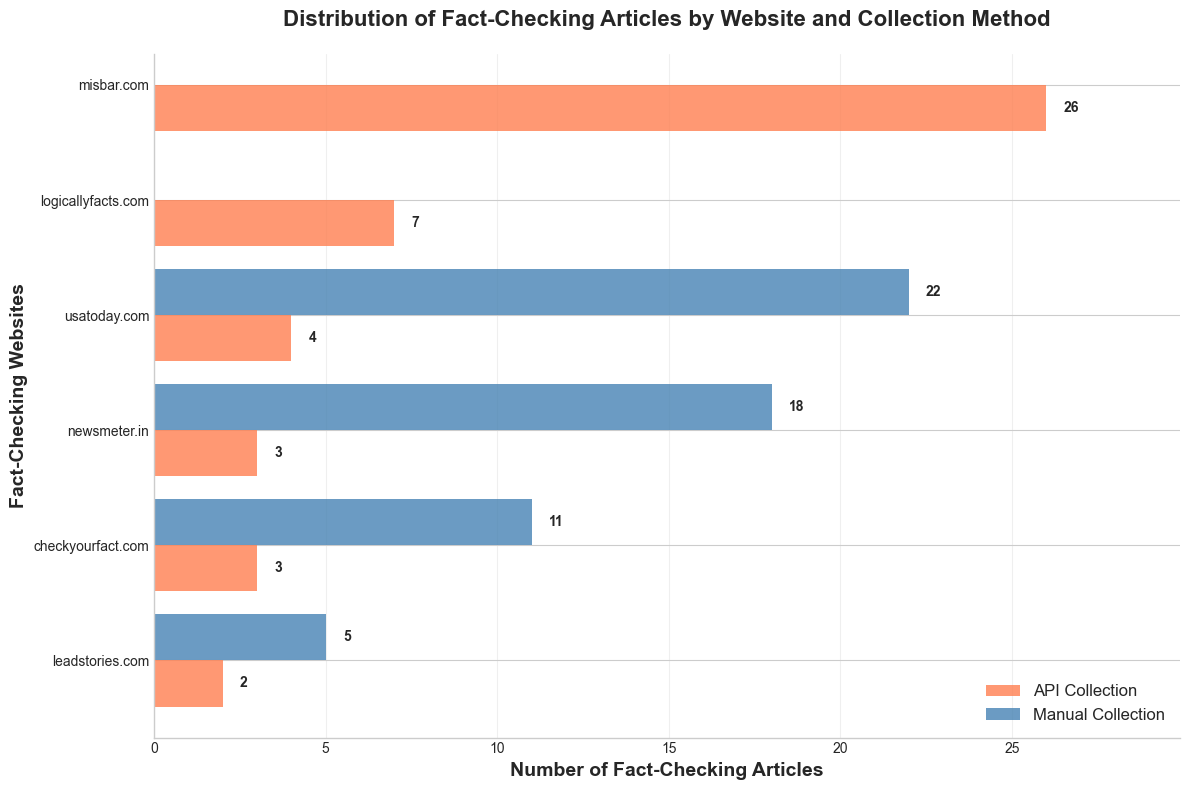

In [15]:
# Recreate your data for demonstration
data = {
    'Data_Collection_Type': ['api', 'api', 'api', 'api', 'api', 'api',
                           'manual', 'manual', 'manual', 'manual'],
    'Website': ['misbar.com', 'logicallyfacts.com', 'usatoday.com', 
               'checkyourfact.com', 'newsmeter.in', 'leadstories.com',
               'Reuters', 'AFP Factcheck', 'Snopes', 'Politifact'],
    'count': [26, 7, 4, 3, 3, 2, 22, 18, 11, 5]
}
df = pd.DataFrame(data)

# Set academic style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")


# Option 1: Horizontal Grouped Bar Chart (Recommended for papers)
fig, ax = plt.subplots(figsize=(12, 8))

# Separate data by collection type
api_data = df[df['Data_Collection_Type'] == 'api'].sort_values('count', ascending=True)
manual_data = df[df['Data_Collection_Type'] == 'manual'].sort_values('count', ascending=True)

# Create positions for bars
y_pos_api = np.arange(len(api_data))
y_pos_manual = np.arange(len(manual_data))

# Create horizontal bar chart
bars1 = ax.barh(y_pos_api - 0.2, api_data['count'], 0.4, 
               label='API Collection', color='#FF7F50', alpha=0.8)
bars2 = ax.barh(y_pos_manual + 0.2, manual_data['count'], 0.4,
               label='Manual Collection', color='#4682B4', alpha=0.8)

# Customize the chart
ax.set_yticks(range(max(len(api_data), len(manual_data))))
ax.set_yticklabels(api_data['Website'].tolist() + [''] * (len(manual_data) - len(api_data)) if len(api_data) > len(manual_data) 
                  else manual_data['Website'].tolist() + [''] * (len(api_data) - len(manual_data)))
ax.set_xlabel('Number of Fact-Checking Articles', fontsize=14, fontweight='bold')
ax.set_ylabel('Fact-Checking Websites', fontsize=14, fontweight='bold')
ax.set_title('Distribution of Fact-Checking Articles by Website and Collection Method', 
            fontsize=16, fontweight='bold', pad=20)

# Add value labels on bars
for bar in bars1:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width)}',
            ha='left', va='center', fontweight='bold')

for bar in bars2:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width)}',
            ha='left', va='center', fontweight='bold')

# Add legend and grid
ax.legend(fontsize=12, loc='lower right')
ax.grid(axis='x', alpha=0.3)
ax.set_xlim(0, max(df['count']) * 1.15)

# Remove spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

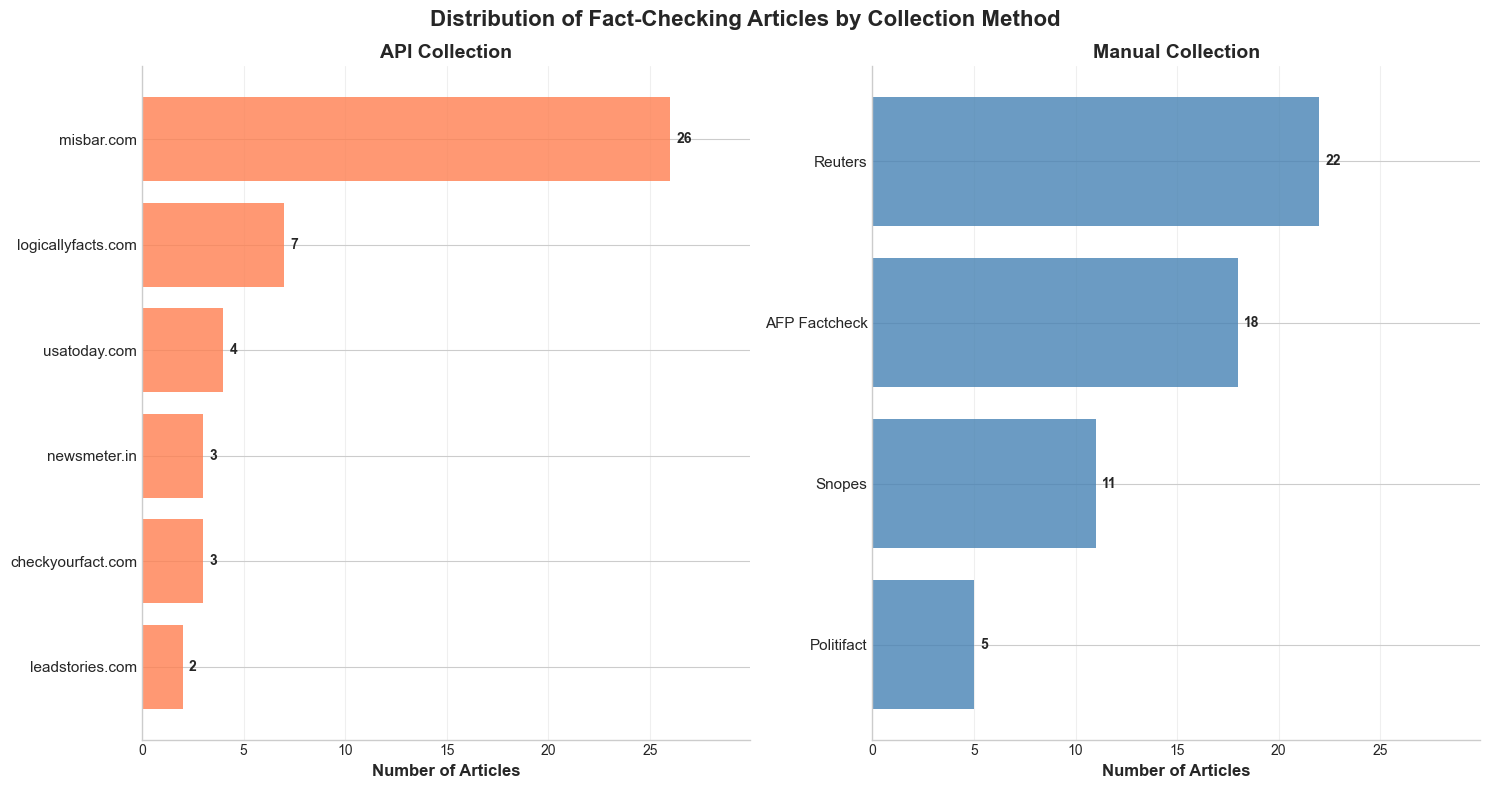

In [16]:
# Option 2: Side-by-Side Subplots (Alternative for clear separation)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=False)

# API subplot
api_sorted = api_data.sort_values('count', ascending=True)
bars1 = ax1.barh(range(len(api_sorted)), api_sorted['count'], 
                color='#FF7F50', alpha=0.8)
ax1.set_yticks(range(len(api_sorted)))
ax1.set_yticklabels(api_sorted['Website'], fontsize=11)
ax1.set_xlabel('Number of Articles', fontsize=12, fontweight='bold')
ax1.set_title('API Collection', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.3, bar.get_y() + bar.get_height()/2, f'{int(width)}',
            ha='left', va='center', fontweight='bold')

# Manual subplot
manual_sorted = manual_data.sort_values('count', ascending=True)
bars2 = ax2.barh(range(len(manual_sorted)), manual_sorted['count'], 
                color='#4682B4', alpha=0.8)
ax2.set_yticks(range(len(manual_sorted)))
ax2.set_yticklabels(manual_sorted['Website'], fontsize=11)
ax2.set_xlabel('Number of Articles', fontsize=12, fontweight='bold')
ax2.set_title('Manual Collection', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + 0.3, bar.get_y() + bar.get_height()/2, f'{int(width)}',
            ha='left', va='center', fontweight='bold')

# Set same x-axis limits for comparison
max_count = max(df['count'])
ax1.set_xlim(0, max_count * 1.15)
ax2.set_xlim(0, max_count * 1.15)

# Remove spines
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.suptitle('Distribution of Fact-Checking Articles by Collection Method', 
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

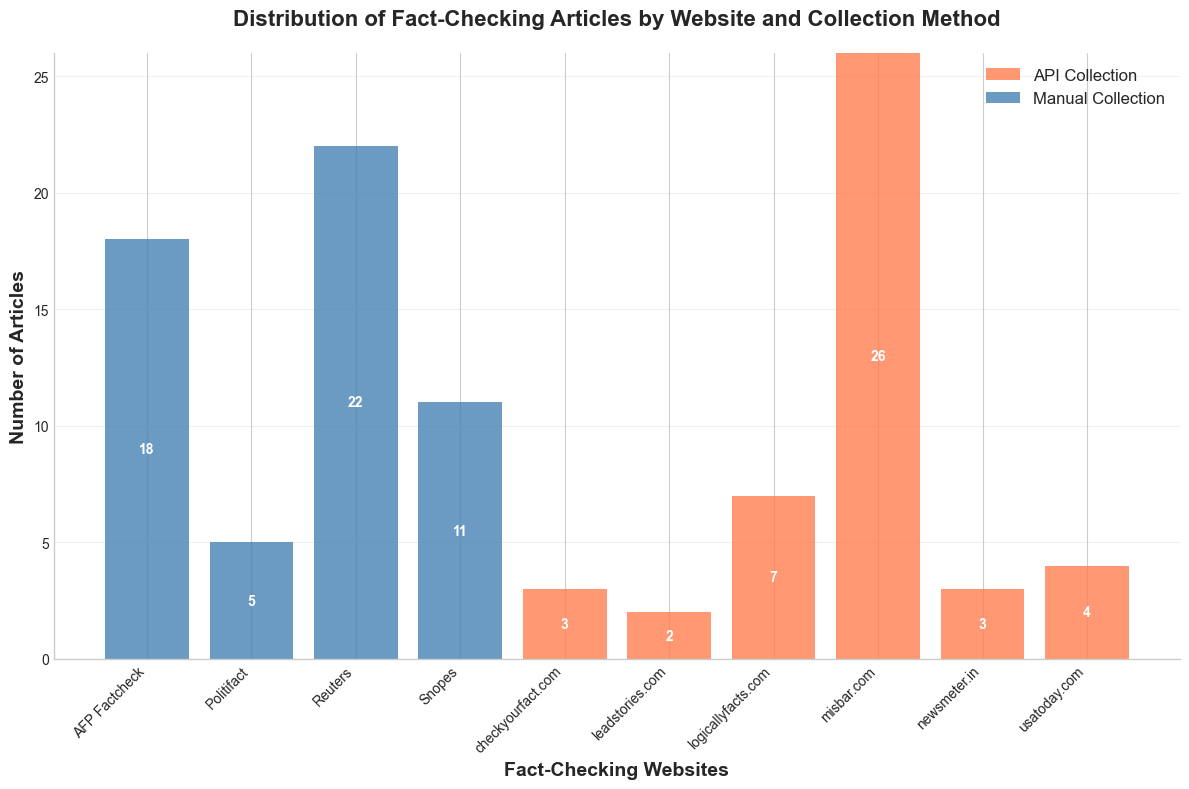

In [17]:
# Option 3: Stacked Bar Chart with Totals
fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for stacked bar
websites_api = api_data.set_index('Website')['count']
websites_manual = manual_data.set_index('Website')['count']

# Create combined index
all_websites = sorted(set(api_data['Website'].tolist() + manual_data['Website'].tolist()))

# Prepare data arrays
api_counts = [websites_api.get(site, 0) for site in all_websites]
manual_counts = [websites_manual.get(site, 0) for site in all_websites]

# Create stacked bar chart
bars1 = ax.bar(all_websites, api_counts, label='API Collection', 
              color='#FF7F50', alpha=0.8)
bars2 = ax.bar(all_websites, manual_counts, bottom=api_counts,
              label='Manual Collection', color='#4682B4', alpha=0.8)

# Customize
ax.set_ylabel('Number of Articles', fontsize=14, fontweight='bold')
ax.set_xlabel('Fact-Checking Websites', fontsize=14, fontweight='bold')
ax.set_title('Distribution of Fact-Checking Articles by Website and Collection Method',
            fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    if bar1.get_height() > 0:
        ax.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2,
               f'{int(bar1.get_height())}', ha='center', va='center',
               fontweight='bold', color='white')
    if bar2.get_height() > 0:
        ax.text(bar2.get_x() + bar2.get_width()/2, 
               bar1.get_height() + bar2.get_height()/2,
               f'{int(bar2.get_height())}', ha='center', va='center',
               fontweight='bold', color='white')

# Add legend and grid
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#### 2) Claim Type Distribution (overall) + (per data collection type)

In [6]:
print(df["Text_Only_Claim"].value_counts())
print(df["Normal_Image"].value_counts())
print(df["AI_Generated_Image"].value_counts())
print(df["Altered_Image"].value_counts())

Text_Only_Claim
False    67
True     34
Name: count, dtype: int64
Normal_Image
False    52
True     49
Name: count, dtype: int64
AI_Generated_Image
False    90
True     11
Name: count, dtype: int64
Altered_Image
False    94
True      7
Name: count, dtype: int64


In [7]:
print(df.groupby("Data_Collection_Type")["Text_Only_Claim"].value_counts())
print(df.groupby("Data_Collection_Type")["Normal_Image"].value_counts())
print(df.groupby("Data_Collection_Type")["AI_Generated_Image"].value_counts())
print(df.groupby("Data_Collection_Type")["Altered_Image"].value_counts())

Data_Collection_Type  Text_Only_Claim
api                   False              36
                      True                9
manual                False              31
                      True               25
Name: count, dtype: int64
Data_Collection_Type  Normal_Image
api                   True            27
                      False           18
manual                False           34
                      True            22
Name: count, dtype: int64
Data_Collection_Type  AI_Generated_Image
api                   False                 40
                      True                   5
manual                False                 50
                      True                   6
Name: count, dtype: int64
Data_Collection_Type  Altered_Image
api                   False            41
                      True              4
manual                False            53
                      True              3
Name: count, dtype: int64


#### 3) Label Website Distribution (overall) + (per data collection type)

In [13]:
df["Label_Website"].value_counts()


Label_Website
false                    42
misleading               24
fake                     12
miscaptioned              7
true                      3
unproven                  2
altered                   2
correct attribution       2
no evidence               1
synthetic media           1
incorrect attribution     1
originated as satire      1
fake poster               1
unsubstantiated           1
ai generated              1
Name: count, dtype: int64

In [10]:
df.groupby("Data_Collection_Type")["Label_Website"].value_counts()

Data_Collection_Type  Label_Website        
api                   misleading               20
                      fake                     11
                      false                    10
                      ai generated              1
                      altered                   1
                      fake poster               1
                      unsubstantiated           1
manual                false                    32
                      miscaptioned              7
                      misleading                4
                      true                      3
                      correct attribution       2
                      unproven                  2
                      altered                   1
                      fake                      1
                      incorrect attribution     1
                      no evidence               1
                      originated as satire      1
                      synthetic media           1
Name: 

In [23]:
df.groupby("AI_Generated_Image")["Label_Website"].value_counts()

AI_Generated_Image  Label_Website        
False               false                    37
                    misleading               23
                    fake                     10
                    miscaptioned              7
                    true                      3
                    altered                   2
                    correct attribution       2
                    unproven                  2
                    incorrect attribution     1
                    no evidence               1
                    originated as satire      1
                    unsubstantiated           1
True                false                     5
                    fake                      2
                    ai generated              1
                    fake poster               1
                    misleading                1
                    synthetic media           1
Name: count, dtype: int64

In [28]:
df.groupby("AI_Generated_Image")[["Data_Collection_Type", "Label_Website"]].value_counts()


AI_Generated_Image  Data_Collection_Type  Label_Website        
False               manual                false                    27
                    api                   misleading               19
                                          false                    10
                                          fake                      9
                    manual                miscaptioned              7
                                          misleading                4
                                          true                      3
                                          correct attribution       2
                                          unproven                  2
                    api                   altered                   1
                                          unsubstantiated           1
                    manual                altered                   1
                                          fake                      1
                          

In [30]:
df.groupby("Altered_Image")["Label_Website"].value_counts()

Altered_Image  Label_Website        
False          false                    41
               misleading               24
               fake                      8
               miscaptioned              7
               true                      3
               correct attribution       2
               unproven                  2
               ai generated              1
               fake poster               1
               incorrect attribution     1
               no evidence               1
               originated as satire      1
               synthetic media           1
               unsubstantiated           1
True           fake                      4
               altered                   2
               false                     1
Name: count, dtype: int64

In [29]:
df.groupby("Altered_Image")[["Data_Collection_Type", "Label_Website"]].value_counts()


Altered_Image  Data_Collection_Type  Label_Website        
False          manual                false                    31
               api                   misleading               20
                                     false                    10
                                     fake                      8
               manual                miscaptioned              7
                                     misleading                4
                                     true                      3
                                     correct attribution       2
                                     unproven                  2
               api                   ai generated              1
                                     fake poster               1
                                     unsubstantiated           1
               manual                incorrect attribution     1
                                     no evidence               1
                               

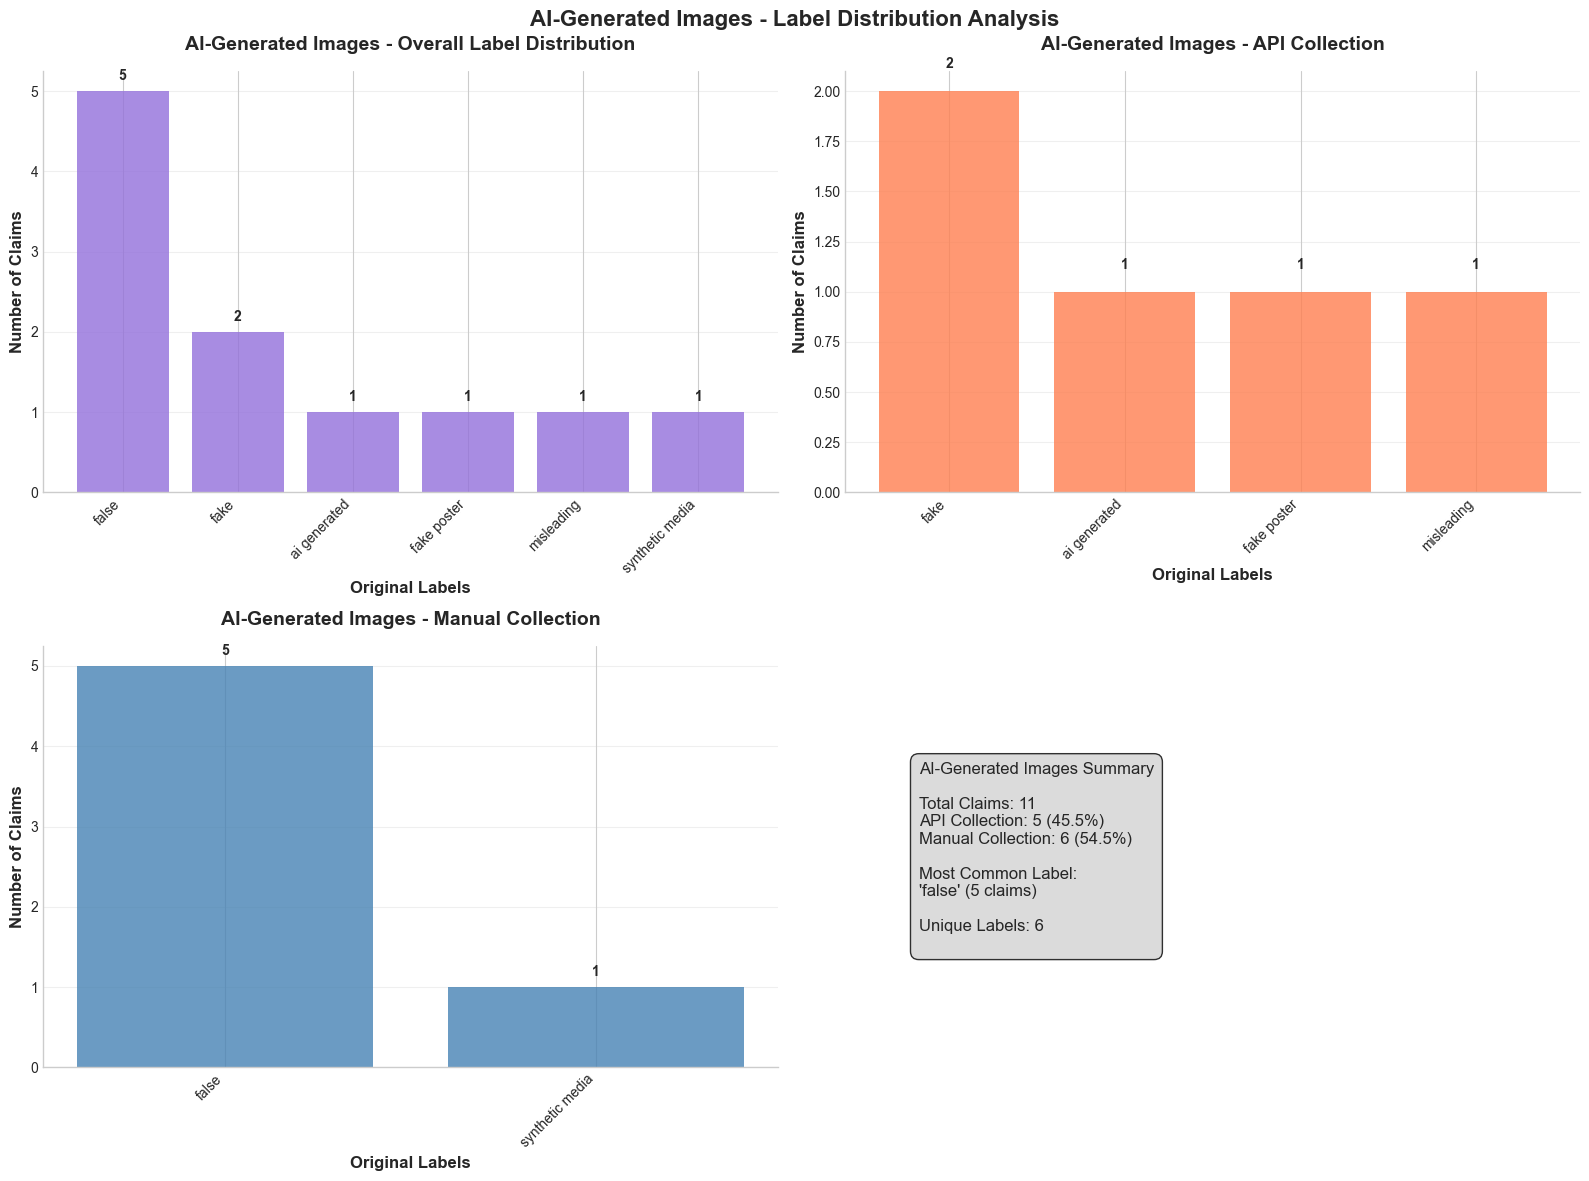

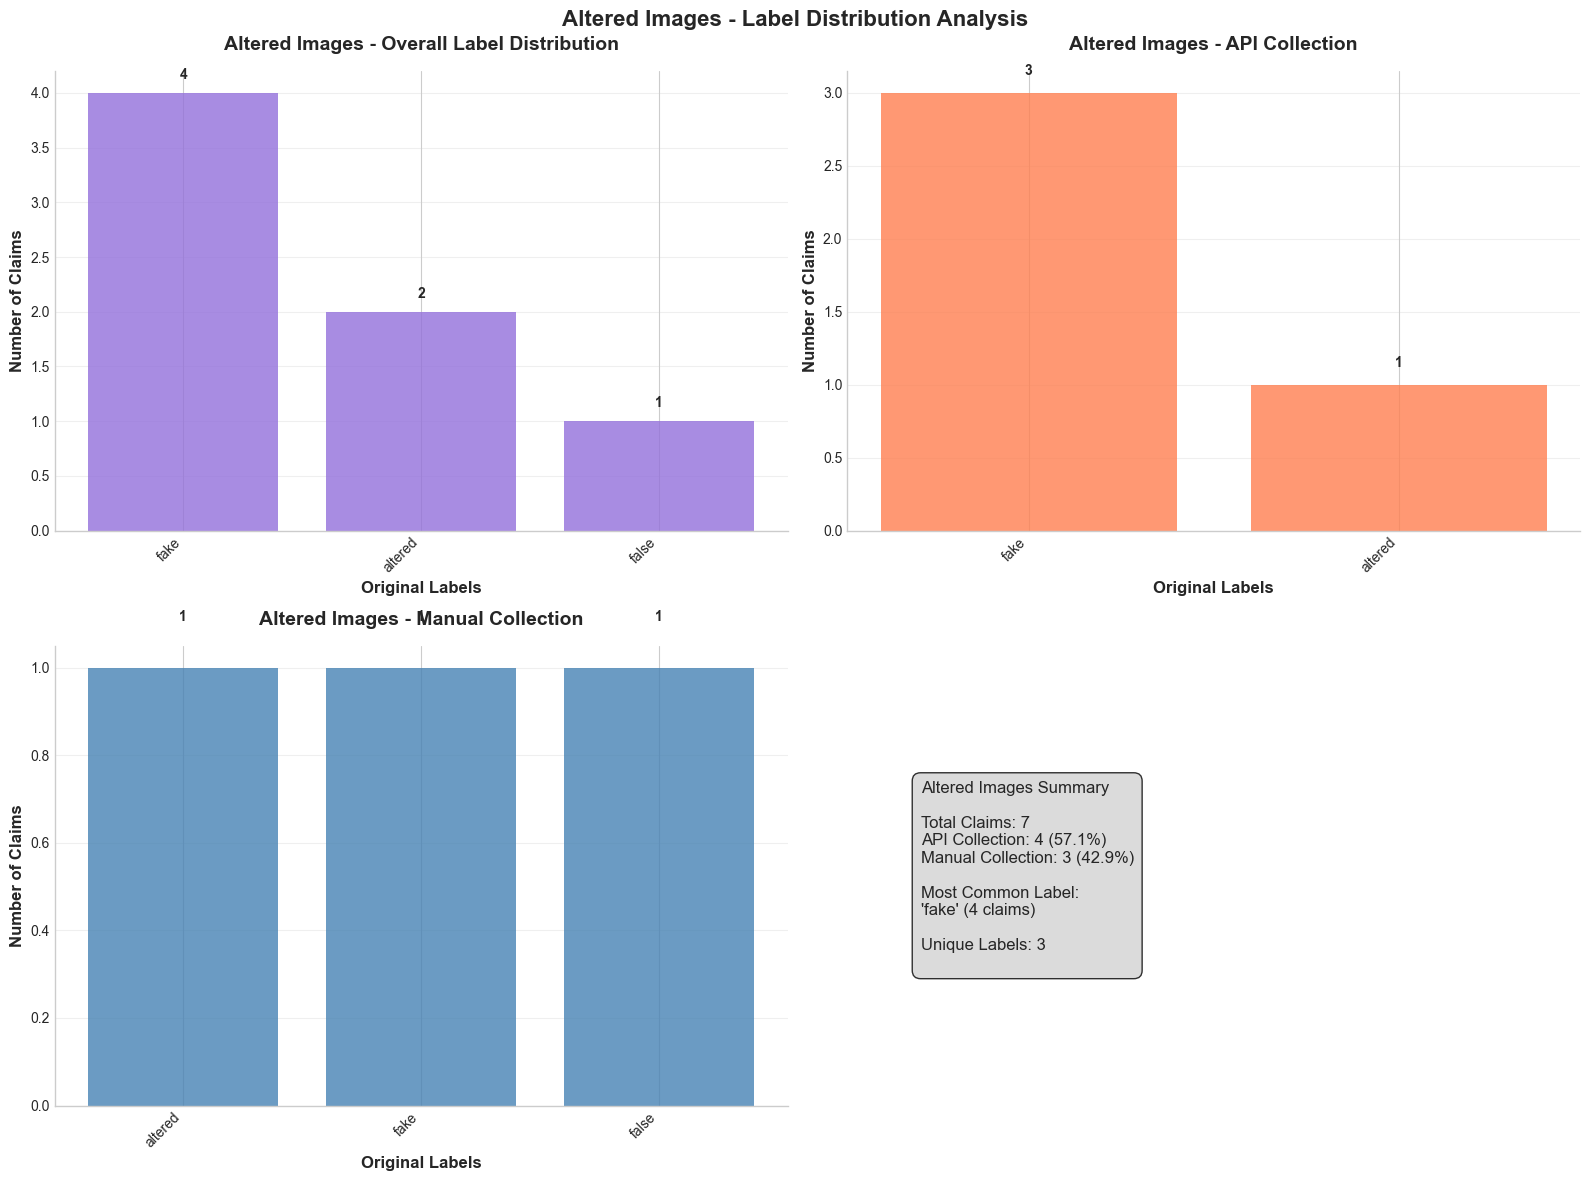

=== COMPARATIVE ANALYSIS ===
AI-Generated Images: 11 total claims
Altered Images: 7 total claims

Label diversity:
AI-Generated: 6 unique labels
Altered: 3 unique labels

Collection method breakdown:
AI-Generated - API: 5, Manual: 6
Altered - API: 4, Manual: 3

=== CODE FOR YOUR DATA ===
# To recreate with your dataframe:
ai_gen_data = df[df['AI_Generated_Image'] == True].groupby('Data_Collection_Type')['Label_Website'].value_counts()


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

# ========= DATA PREPARATION =========

# AI-Generated Images (True values only) - Overall
ai_generated_labels_overall = {
    'false': 5,
    'fake': 2,
    'ai generated': 1,
    'fake poster': 1,
    'misleading': 1,
    'synthetic media': 1
}

# AI-Generated Images by collection type
ai_generated_by_collection = {
    'api': {'fake': 2, 'ai generated': 1, 'fake poster': 1, 'misleading': 1},
    'manual': {'false': 5, 'synthetic media': 1}
}

# Altered Images (True values only) - Overall
altered_labels_overall = {
    'fake': 4,
    'altered': 2,
    'false': 1
}

# Altered Images by collection type
altered_by_collection = {
    'api': {'fake': 3, 'altered': 1},
    'manual': {'altered': 1, 'fake': 1, 'false': 1}
}

# ========= AI-GENERATED IMAGES VISUALIZATION =========

# Create figure with subplots for AI-Generated images
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# === TOP LEFT: Overall AI-Generated Images ===
ai_labels = list(ai_generated_labels_overall.keys())
ai_counts = list(ai_generated_labels_overall.values())

# Sort by frequency
ai_sorted = sorted(zip(ai_labels, ai_counts), key=lambda x: x[1], reverse=True)
ai_labels_sorted = [item[0] for item in ai_sorted]
ai_counts_sorted = [item[1] for item in ai_sorted]

bars1 = ax1.bar(ai_labels_sorted, ai_counts_sorted, color='#9370DB', alpha=0.8)

ax1.set_ylabel('Number of Claims', fontsize=12, fontweight='bold')
ax1.set_xlabel('Original Labels', fontsize=12, fontweight='bold')
ax1.set_title('AI-Generated Images - Overall Label Distribution', fontsize=14, fontweight='bold', pad=15)

# Rotate x-axis labels
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax1.grid(axis='y', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# === TOP RIGHT: AI-Generated Images by Collection Type ===
# Prepare data for API
api_ai_labels = list(ai_generated_by_collection['api'].keys())
api_ai_counts = list(ai_generated_by_collection['api'].values())

# Sort API data
api_ai_sorted = sorted(zip(api_ai_labels, api_ai_counts), key=lambda x: x[1], reverse=True)
api_ai_labels_sorted = [item[0] for item in api_ai_sorted]
api_ai_counts_sorted = [item[1] for item in api_ai_sorted]

bars2 = ax2.bar(api_ai_labels_sorted, api_ai_counts_sorted, color='#FF7F50', alpha=0.8)

ax2.set_ylabel('Number of Claims', fontsize=12, fontweight='bold')
ax2.set_xlabel('Original Labels', fontsize=12, fontweight='bold')
ax2.set_title('AI-Generated Images - API Collection', fontsize=14, fontweight='bold', pad=15)

plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax2.grid(axis='y', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# === BOTTOM LEFT: Manual Collection for AI-Generated Images ===
manual_ai_labels = list(ai_generated_by_collection['manual'].keys())
manual_ai_counts = list(ai_generated_by_collection['manual'].values())

# Sort manual data
manual_ai_sorted = sorted(zip(manual_ai_labels, manual_ai_counts), key=lambda x: x[1], reverse=True)
manual_ai_labels_sorted = [item[0] for item in manual_ai_sorted]
manual_ai_counts_sorted = [item[1] for item in manual_ai_sorted]

bars3 = ax3.bar(manual_ai_labels_sorted, manual_ai_counts_sorted, color='#4682B4', alpha=0.8)

ax3.set_ylabel('Number of Claims', fontsize=12, fontweight='bold')
ax3.set_xlabel('Original Labels', fontsize=12, fontweight='bold')
ax3.set_title('AI-Generated Images - Manual Collection', fontsize=14, fontweight='bold', pad=15)

plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax3.grid(axis='y', alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# === BOTTOM RIGHT: Summary Stats for AI-Generated ===
ax4.axis('off')
ai_total = sum(ai_generated_labels_overall.values())
api_ai_total = sum(ai_generated_by_collection['api'].values())
manual_ai_total = sum(ai_generated_by_collection['manual'].values())

summary_text = f"""AI-Generated Images Summary

Total Claims: {ai_total}
API Collection: {api_ai_total} ({api_ai_total/ai_total*100:.1f}%)
Manual Collection: {manual_ai_total} ({manual_ai_total/ai_total*100:.1f}%)

Most Common Label: 
'{ai_labels_sorted[0]}' ({ai_counts_sorted[0]} claims)

Unique Labels: {len(ai_generated_labels_overall)}
"""

ax4.text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

plt.suptitle('AI-Generated Images - Label Distribution Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ========= ALTERED IMAGES VISUALIZATION =========

# Create figure with subplots for Altered images
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# === TOP LEFT: Overall Altered Images ===
altered_labels = list(altered_labels_overall.keys())
altered_counts = list(altered_labels_overall.values())

# Sort by frequency
altered_sorted = sorted(zip(altered_labels, altered_counts), key=lambda x: x[1], reverse=True)
altered_labels_sorted = [item[0] for item in altered_sorted]
altered_counts_sorted = [item[1] for item in altered_sorted]

bars1 = ax1.bar(altered_labels_sorted, altered_counts_sorted, color='#9370DB', alpha=0.8)

ax1.set_ylabel('Number of Claims', fontsize=12, fontweight='bold')
ax1.set_xlabel('Original Labels', fontsize=12, fontweight='bold')
ax1.set_title('Altered Images - Overall Label Distribution', fontsize=14, fontweight='bold', pad=15)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax1.grid(axis='y', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# === TOP RIGHT: Altered Images - API Collection ===
api_altered_labels = list(altered_by_collection['api'].keys())
api_altered_counts = list(altered_by_collection['api'].values())

# Sort API data
api_altered_sorted = sorted(zip(api_altered_labels, api_altered_counts), key=lambda x: x[1], reverse=True)
api_altered_labels_sorted = [item[0] for item in api_altered_sorted]
api_altered_counts_sorted = [item[1] for item in api_altered_sorted]

bars2 = ax2.bar(api_altered_labels_sorted, api_altered_counts_sorted, color='#FF7F50', alpha=0.8)

ax2.set_ylabel('Number of Claims', fontsize=12, fontweight='bold')
ax2.set_xlabel('Original Labels', fontsize=12, fontweight='bold')
ax2.set_title('Altered Images - API Collection', fontsize=14, fontweight='bold', pad=15)

plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax2.grid(axis='y', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# === BOTTOM LEFT: Altered Images - Manual Collection ===
manual_altered_labels = list(altered_by_collection['manual'].keys())
manual_altered_counts = list(altered_by_collection['manual'].values())

# Sort manual data
manual_altered_sorted = sorted(zip(manual_altered_labels, manual_altered_counts), key=lambda x: x[1], reverse=True)
manual_altered_labels_sorted = [item[0] for item in manual_altered_sorted]
manual_altered_counts_sorted = [item[1] for item in manual_altered_sorted]

bars3 = ax3.bar(manual_altered_labels_sorted, manual_altered_counts_sorted, color='#4682B4', alpha=0.8)

ax3.set_ylabel('Number of Claims', fontsize=12, fontweight='bold')
ax3.set_xlabel('Original Labels', fontsize=12, fontweight='bold')
ax3.set_title('Altered Images - Manual Collection', fontsize=14, fontweight='bold', pad=15)

plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax3.grid(axis='y', alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# === BOTTOM RIGHT: Summary Stats for Altered ===
ax4.axis('off')
altered_total = sum(altered_labels_overall.values())
api_altered_total = sum(altered_by_collection['api'].values())
manual_altered_total = sum(altered_by_collection['manual'].values())

summary_text = f"""Altered Images Summary

Total Claims: {altered_total}
API Collection: {api_altered_total} ({api_altered_total/altered_total*100:.1f}%)
Manual Collection: {manual_altered_total} ({manual_altered_total/altered_total*100:.1f}%)

Most Common Label: 
'{altered_labels_sorted[0]}' ({altered_counts_sorted[0]} claims)

Unique Labels: {len(altered_labels_overall)}
"""

ax4.text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

plt.suptitle('Altered Images - Label Distribution Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ========= COMPARATIVE ANALYSIS =========

print("=== COMPARATIVE ANALYSIS ===")
print(f"AI-Generated Images: {sum(ai_generated_labels_overall.values())} total claims")
print(f"Altered Images: {sum(altered_labels_overall.values())} total claims")
print()
print("Label diversity:")
print(f"AI-Generated: {len(ai_generated_labels_overall)} unique labels")
print(f"Altered: {len(altered_labels_overall)} unique labels")
print()
print("Collection method breakdown:")
print(f"AI-Generated - API: {sum(ai_generated_by_collection['api'].values())}, Manual: {sum(ai_generated_by_collection['manual'].values())}")
print(f"Altered - API: {sum(altered_by_collection['api'].values())}, Manual: {sum(altered_by_collection['manual'].values())}")

# Code for your data
print("\n=== CODE FOR YOUR DATA ===")
print("# To recreate with your dataframe:")
print("ai_gen_data = df[df['AI_Generated_Image'] == True].groupby('Data_Collection_Type')['Label_Website'].value_counts()")
#print("altered_data = df[df['Altered_Image'] == True].groupby('Data_Collection_Type')

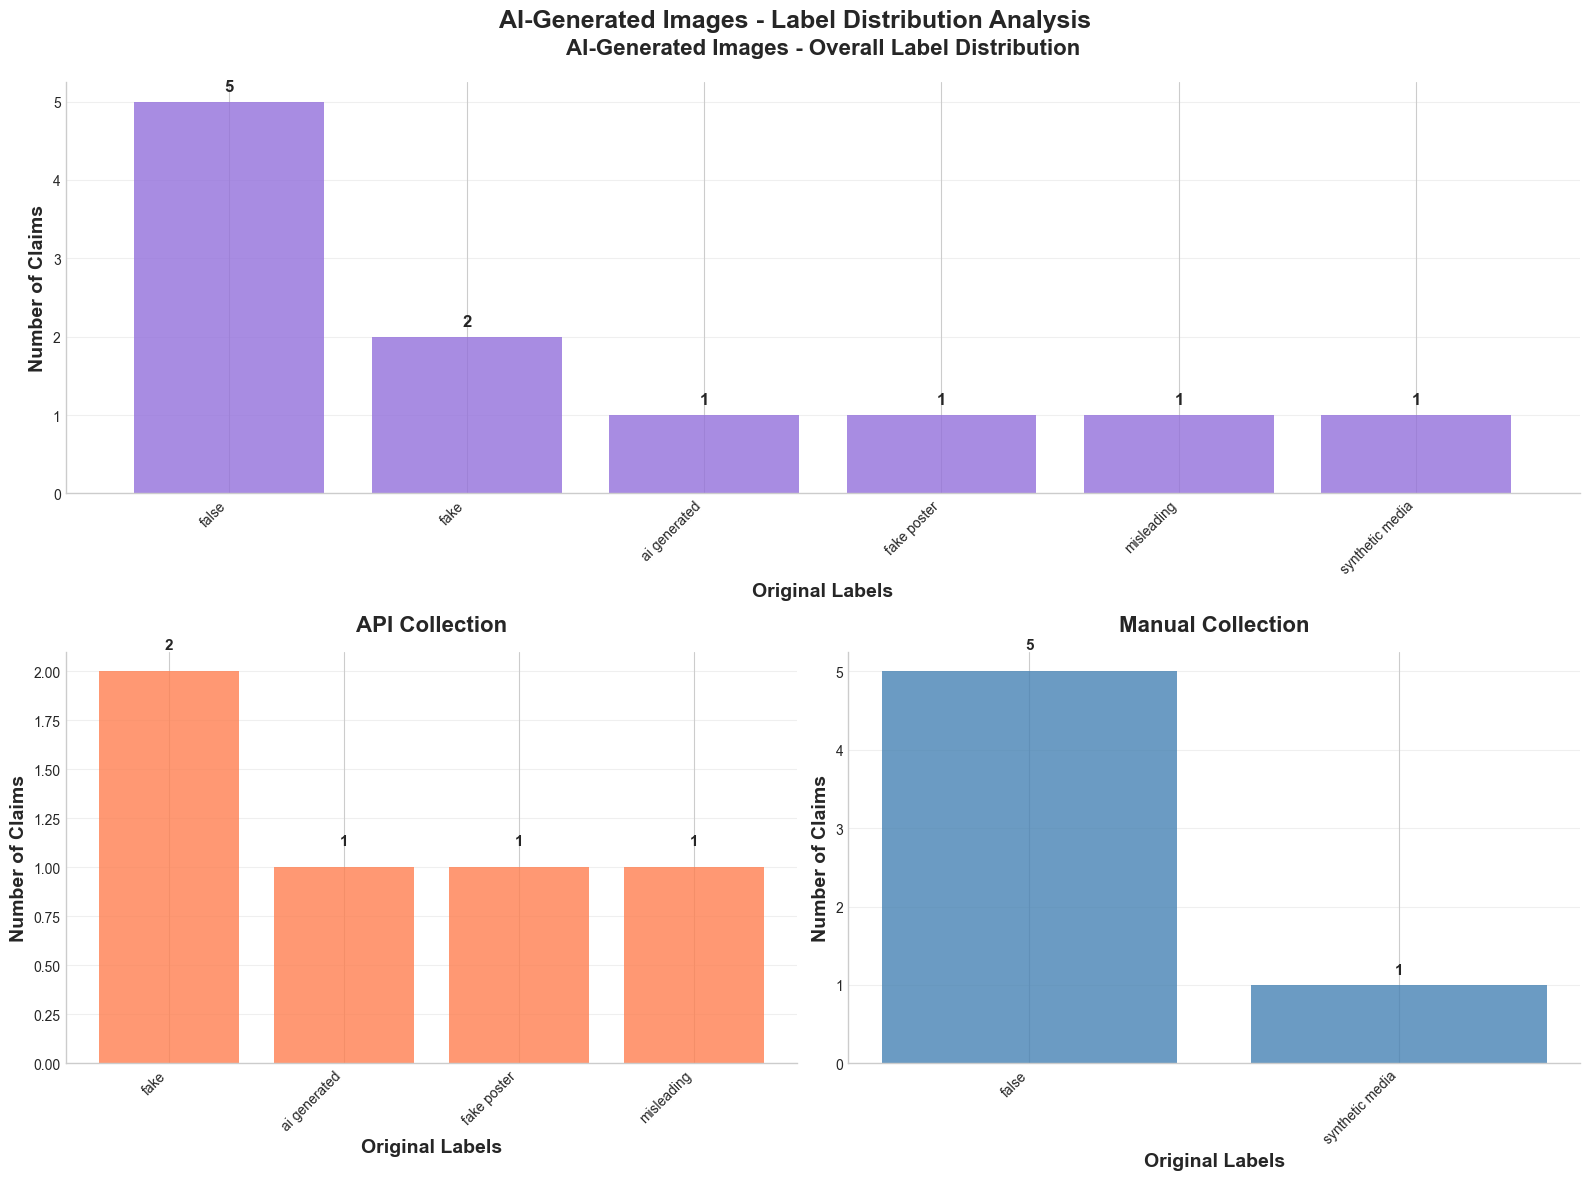

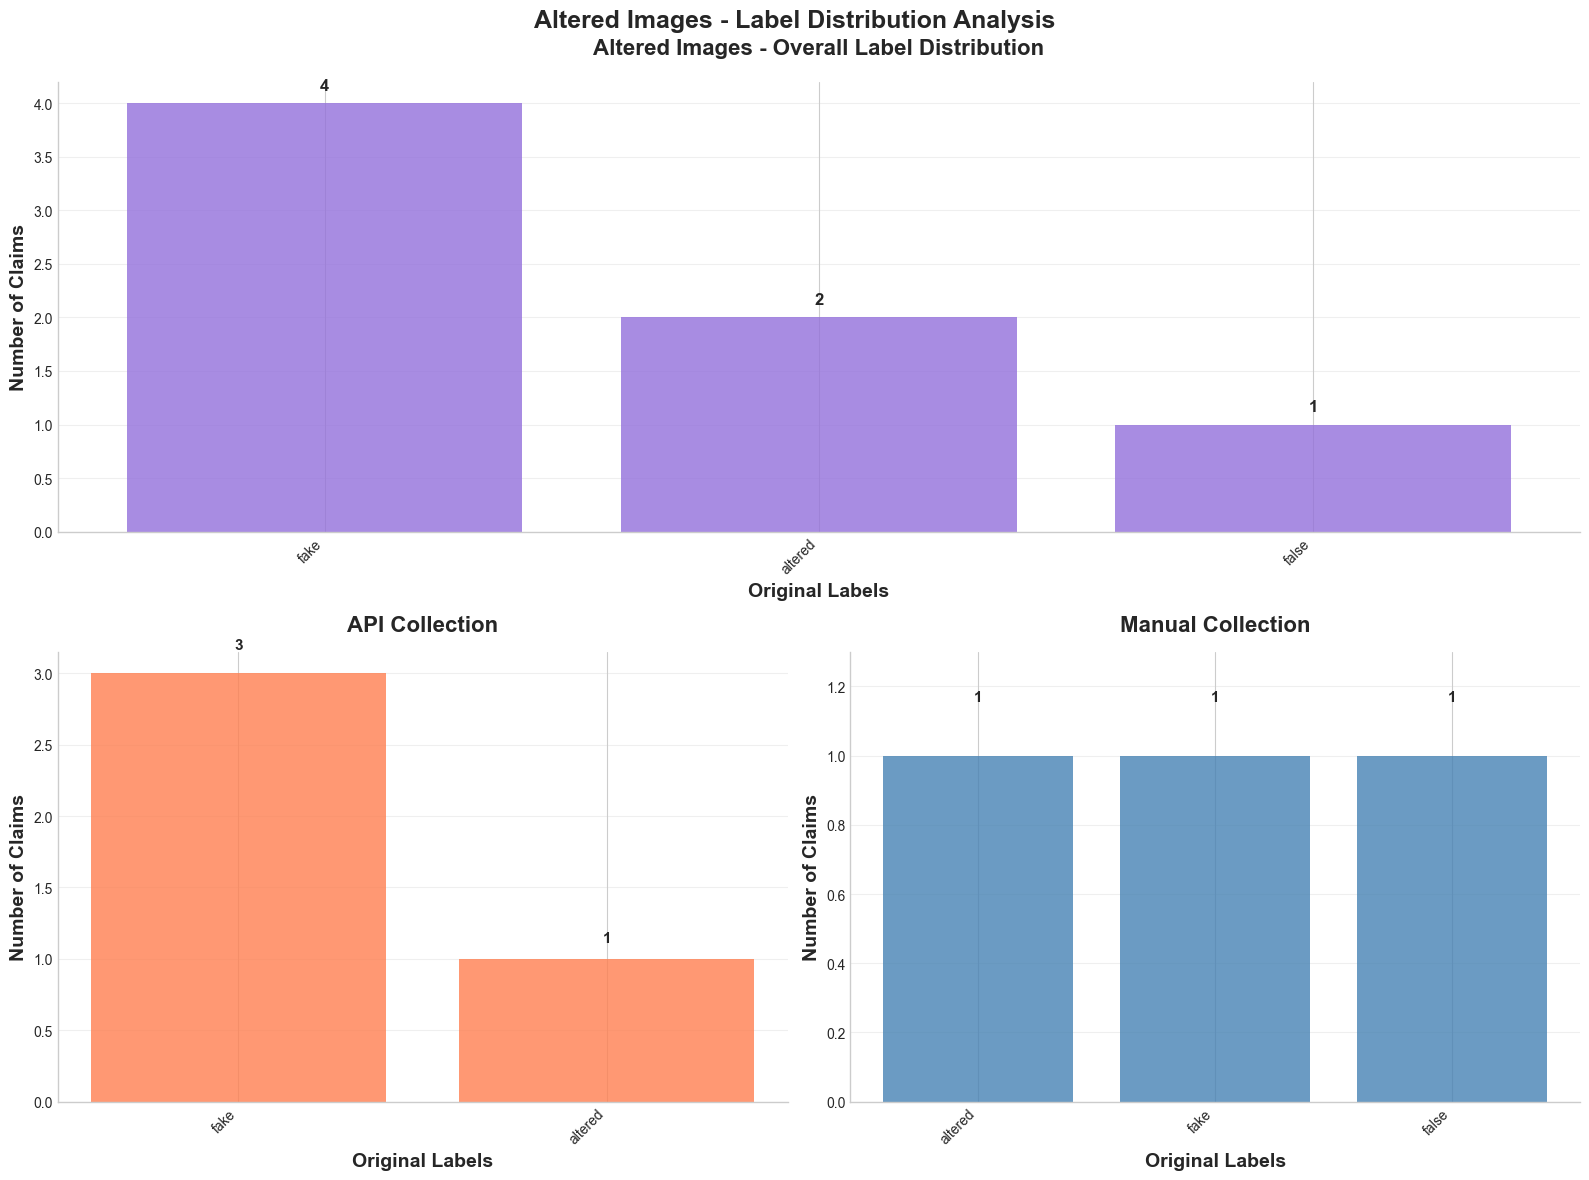

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

# ========= DATA PREPARATION =========

# AI-Generated Images (True values only) - Overall
ai_generated_labels_overall = {
    'false': 5,
    'fake': 2,
    'ai generated': 1,
    'fake poster': 1,
    'misleading': 1,
    'synthetic media': 1
}

# AI-Generated Images by collection type
ai_generated_by_collection = {
    'api': {'fake': 2, 'ai generated': 1, 'fake poster': 1, 'misleading': 1},
    'manual': {'false': 5, 'synthetic media': 1}
}

# Altered Images (True values only) - Overall
altered_labels_overall = {
    'fake': 4,
    'altered': 2,
    'false': 1
}

# Altered Images by collection type
altered_by_collection = {
    'api': {'fake': 3, 'altered': 1},
    'manual': {'altered': 1, 'fake': 1, 'false': 1}
}

# ========= AI-GENERATED IMAGES VISUALIZATION =========

# Create figure with custom subplot layout
fig = plt.figure(figsize=(16, 12))

# Create a custom grid layout
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

# Top subplot spanning both columns (centered)
ax1 = fig.add_subplot(gs[0, :])

# Bottom two subplots
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# === TOP: Overall AI-Generated Images ===
ai_labels = list(ai_generated_labels_overall.keys())
ai_counts = list(ai_generated_labels_overall.values())

# Sort by frequency
ai_sorted = sorted(zip(ai_labels, ai_counts), key=lambda x: x[1], reverse=True)
ai_labels_sorted = [item[0] for item in ai_sorted]
ai_counts_sorted = [item[1] for item in ai_sorted]

bars1 = ax1.bar(ai_labels_sorted, ai_counts_sorted, color='#9370DB', alpha=0.8)

ax1.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax1.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax1.set_title('AI-Generated Images - Overall Label Distribution', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels with better positioning
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=12)

ax1.grid(axis='y', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# === BOTTOM LEFT: API Collection for AI-Generated Images ===
api_ai_labels = list(ai_generated_by_collection['api'].keys())
api_ai_counts = list(ai_generated_by_collection['api'].values())

# Sort API data
api_ai_sorted = sorted(zip(api_ai_labels, api_ai_counts), key=lambda x: x[1], reverse=True)
api_ai_labels_sorted = [item[0] for item in api_ai_sorted]
api_ai_counts_sorted = [item[1] for item in api_ai_sorted]

bars2 = ax2.bar(api_ai_labels_sorted, api_ai_counts_sorted, color='#FF7F50', alpha=0.8)

ax2.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax2.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax2.set_title('API Collection', fontsize=16, fontweight='bold', pad=15)

plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels with improved visibility
for bar in bars2:
    height = bar.get_height()
    # Ensure labels are always visible above bars
    y_pos = height + max(0.1, height * 0.05)
    ax2.text(bar.get_x() + bar.get_width()/2, y_pos,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

ax2.grid(axis='y', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# === BOTTOM RIGHT: Manual Collection for AI-Generated Images ===
manual_ai_labels = list(ai_generated_by_collection['manual'].keys())
manual_ai_counts = list(ai_generated_by_collection['manual'].values())

# Sort manual data
manual_ai_sorted = sorted(zip(manual_ai_labels, manual_ai_counts), key=lambda x: x[1], reverse=True)
manual_ai_labels_sorted = [item[0] for item in manual_ai_sorted]
manual_ai_counts_sorted = [item[1] for item in manual_ai_sorted]

bars3 = ax3.bar(manual_ai_labels_sorted, manual_ai_counts_sorted, color='#4682B4', alpha=0.8)

ax3.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax3.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax3.set_title('Manual Collection', fontsize=16, fontweight='bold', pad=15)

plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels with improved visibility
for bar in bars3:
    height = bar.get_height()
    # Ensure labels are always visible above bars
    y_pos = height + max(0.1, height * 0.05)
    ax3.text(bar.get_x() + bar.get_width()/2, y_pos,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

ax3.grid(axis='y', alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

plt.suptitle('AI-Generated Images - Label Distribution Analysis', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# ========= ALTERED IMAGES VISUALIZATION =========

# Create figure with same custom layout
fig = plt.figure(figsize=(16, 12))

# Create the same custom grid layout
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

# Top subplot spanning both columns (centered)
ax1 = fig.add_subplot(gs[0, :])

# Bottom two subplots
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# === TOP: Overall Altered Images ===
altered_labels = list(altered_labels_overall.keys())
altered_counts = list(altered_labels_overall.values())

# Sort by frequency
altered_sorted = sorted(zip(altered_labels, altered_counts), key=lambda x: x[1], reverse=True)
altered_labels_sorted = [item[0] for item in altered_sorted]
altered_counts_sorted = [item[1] for item in altered_sorted]

bars1 = ax1.bar(altered_labels_sorted, altered_counts_sorted, color='#9370DB', alpha=0.8)

ax1.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax1.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax1.set_title('Altered Images - Overall Label Distribution', fontsize=16, fontweight='bold', pad=20)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels with better positioning
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=12)

ax1.grid(axis='y', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# === BOTTOM LEFT: API Collection for Altered Images ===
api_altered_labels = list(altered_by_collection['api'].keys())
api_altered_counts = list(altered_by_collection['api'].values())

# Sort API data
api_altered_sorted = sorted(zip(api_altered_labels, api_altered_counts), key=lambda x: x[1], reverse=True)
api_altered_labels_sorted = [item[0] for item in api_altered_sorted]
api_altered_counts_sorted = [item[1] for item in api_altered_sorted]

bars2 = ax2.bar(api_altered_labels_sorted, api_altered_counts_sorted, color='#FF7F50', alpha=0.8)

ax2.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax2.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax2.set_title('API Collection', fontsize=16, fontweight='bold', pad=15)

plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels with improved visibility
for bar in bars2:
    height = bar.get_height()
    # Ensure labels are always visible above bars
    y_pos = height + max(0.1, height * 0.05)
    ax2.text(bar.get_x() + bar.get_width()/2, y_pos,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

ax2.grid(axis='y', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# === BOTTOM RIGHT: Manual Collection for Altered Images ===
manual_altered_labels = list(altered_by_collection['manual'].keys())
manual_altered_counts = list(altered_by_collection['manual'].values())

# Sort manual data
manual_altered_sorted = sorted(zip(manual_altered_labels, manual_altered_counts), key=lambda x: x[1], reverse=True)
manual_altered_labels_sorted = [item[0] for item in manual_altered_sorted]
manual_altered_counts_sorted = [item[1] for item in manual_altered_sorted]

bars3 = ax3.bar(manual_altered_labels_sorted, manual_altered_counts_sorted, color='#4682B4', alpha=0.8)

ax3.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax3.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax3.set_title('Manual Collection', fontsize=16, fontweight='bold', pad=15)

plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels with improved visibility - FIXED the issue with "1" not being visible
for bar in bars3:
    height = bar.get_height()
    # For small values, ensure the label is clearly visible
    if height <= 1:
        y_pos = height + 0.15  # More space for small values
    else:
        y_pos = height + max(0.1, height * 0.05)
    
    ax3.text(bar.get_x() + bar.get_width()/2, y_pos,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Set y-axis limits to ensure labels are visible
ax3.set_ylim(0, max(manual_altered_counts_sorted) * 1.3)

ax3.grid(axis='y', alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

plt.suptitle('Altered Images - Label Distribution Analysis', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


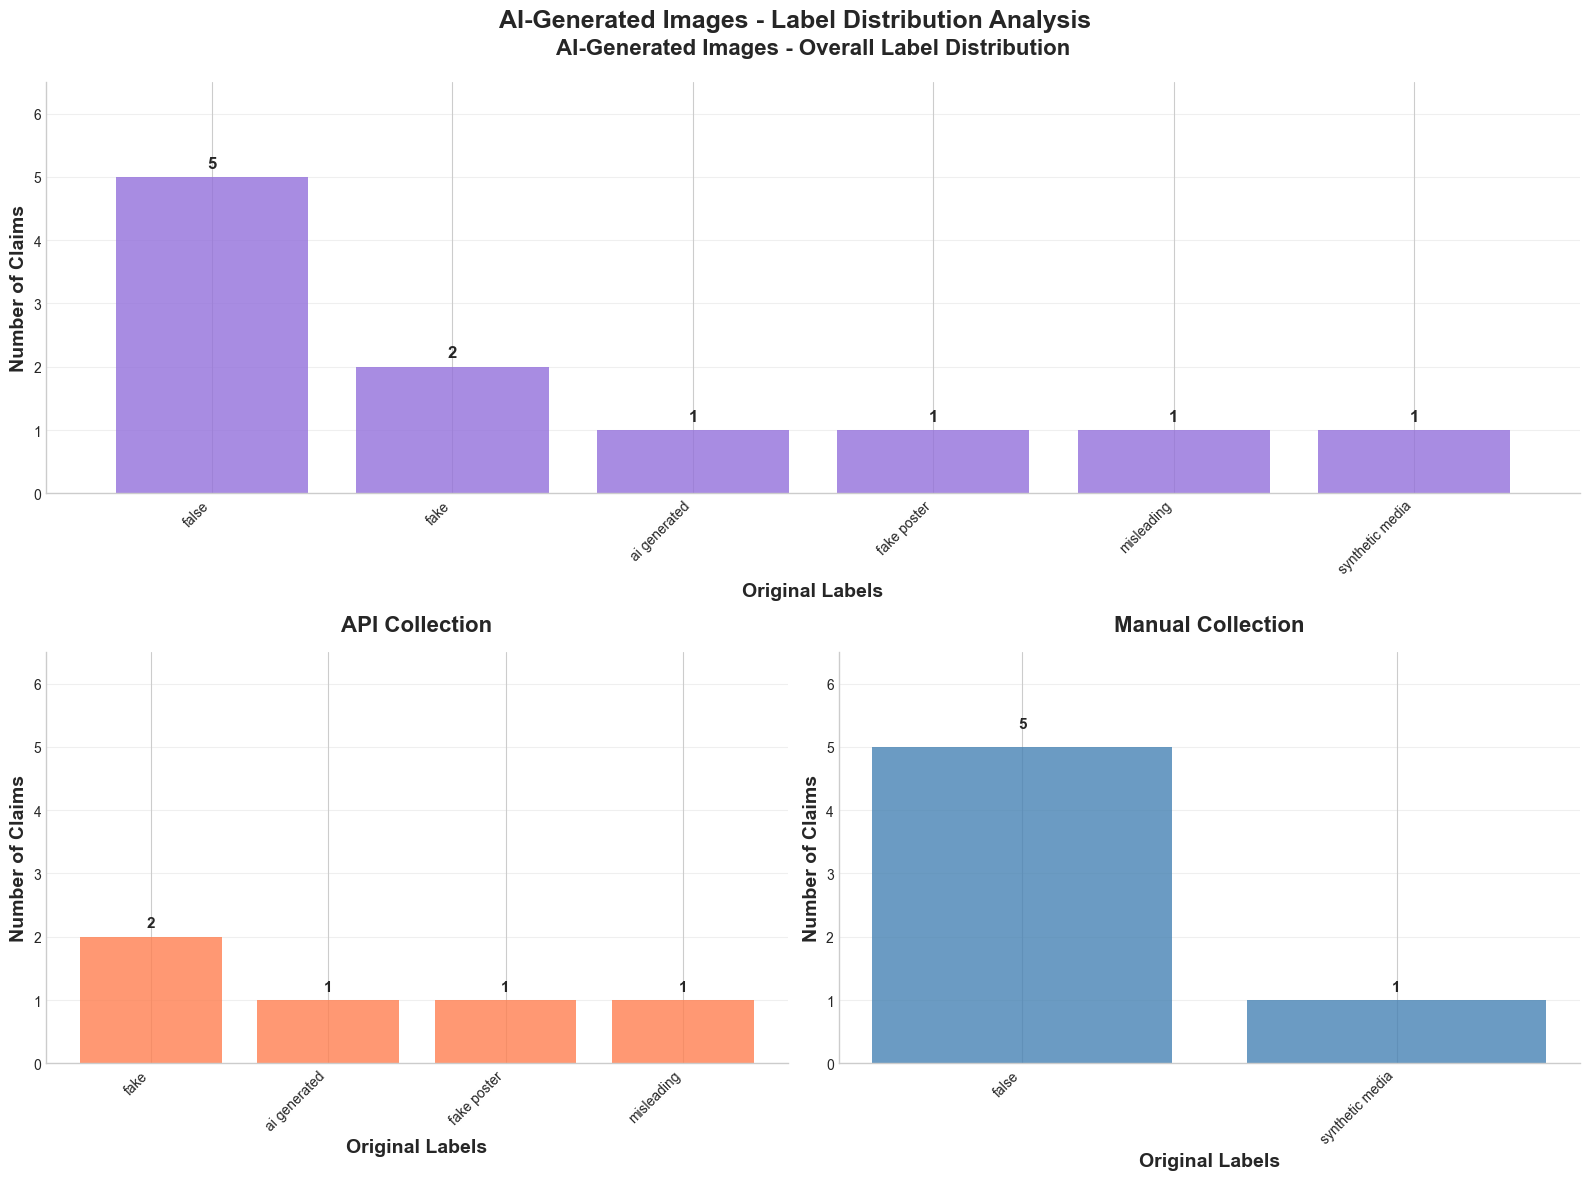

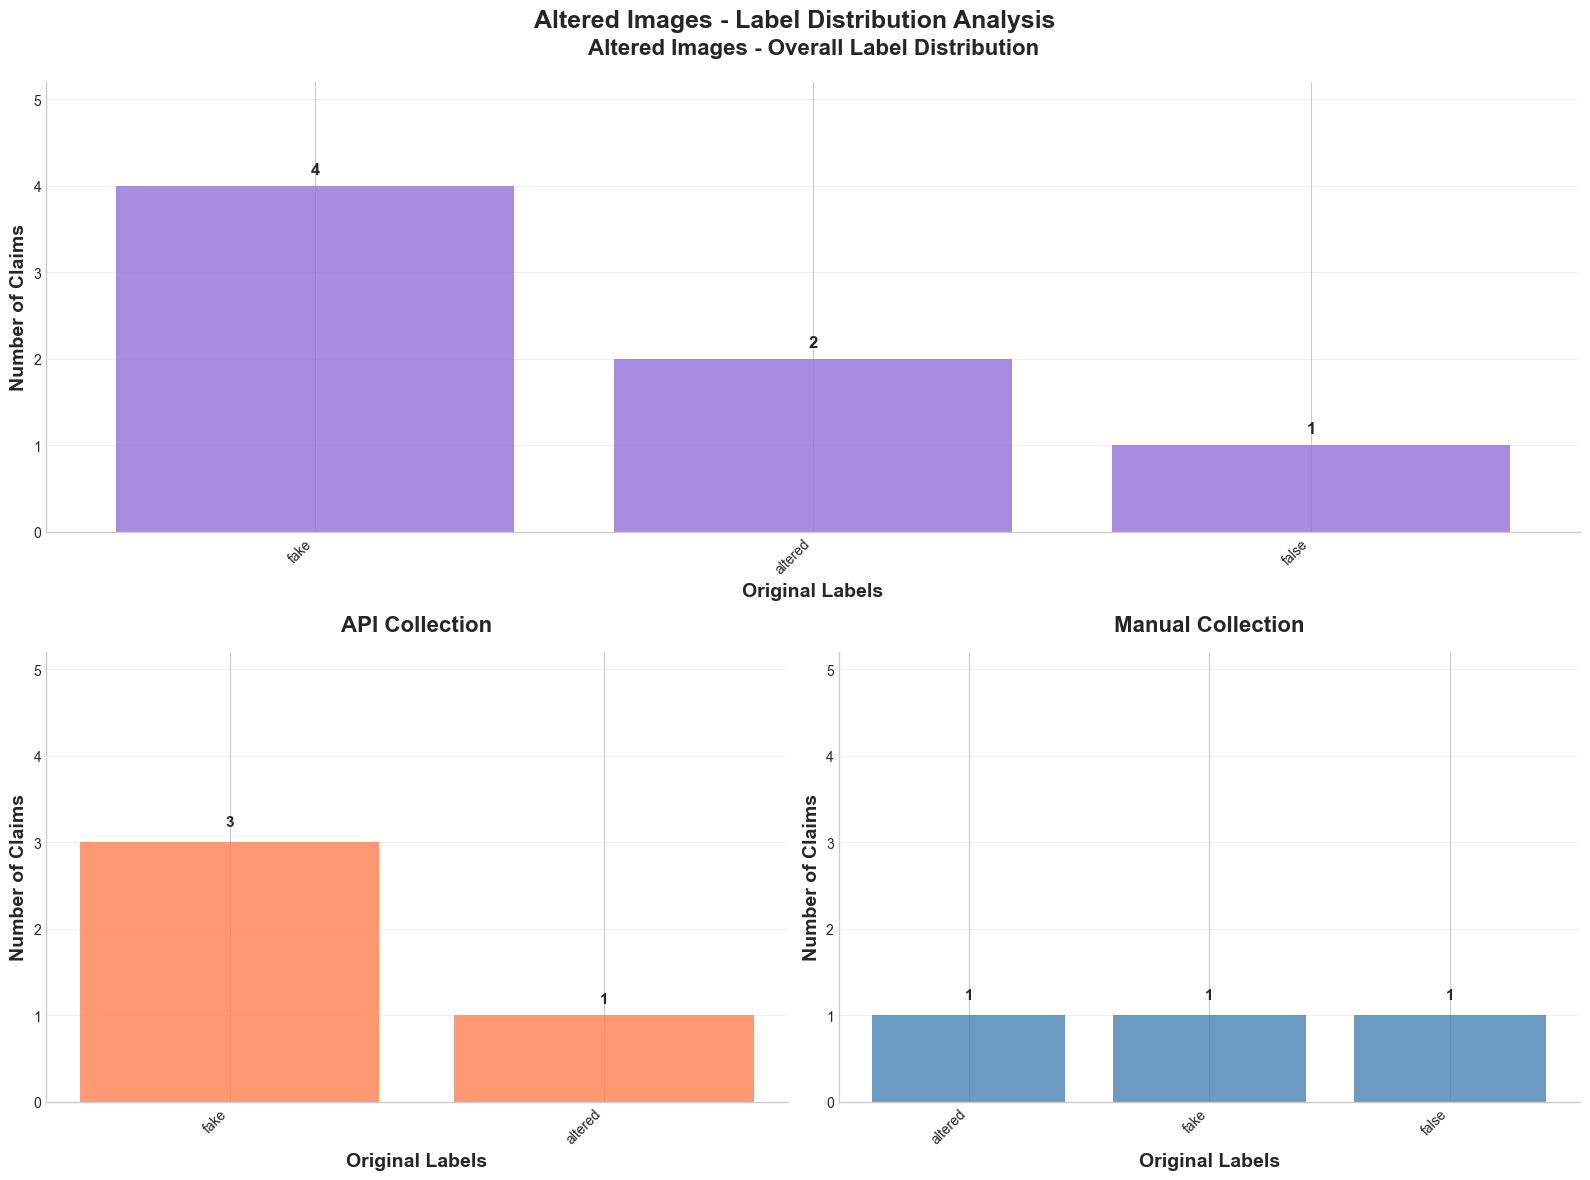

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

# ========= DATA PREPARATION =========

# AI-Generated Images (True values only) - Overall
ai_generated_labels_overall = {
    'false': 5,
    'fake': 2,
    'ai generated': 1,
    'fake poster': 1,
    'misleading': 1,
    'synthetic media': 1
}

# AI-Generated Images by collection type
ai_generated_by_collection = {
    'api': {'fake': 2, 'ai generated': 1, 'fake poster': 1, 'misleading': 1},
    'manual': {'false': 5, 'synthetic media': 1}
}

# Altered Images (True values only) - Overall
altered_labels_overall = {
    'fake': 4,
    'altered': 2,
    'false': 1
}

# Altered Images by collection type
altered_by_collection = {
    'api': {'fake': 3, 'altered': 1},
    'manual': {'altered': 1, 'fake': 1, 'false': 1}
}

# ========= AI-GENERATED IMAGES VISUALIZATION =========

# Create figure with custom subplot layout
fig = plt.figure(figsize=(16, 12))

# Create a custom grid layout
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

# Top subplot spanning both columns (centered)
ax1 = fig.add_subplot(gs[0, :])

# Bottom two subplots
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# === TOP: Overall AI-Generated Images ===
ai_labels = list(ai_generated_labels_overall.keys())
ai_counts = list(ai_generated_labels_overall.values())

# Sort by frequency
ai_sorted = sorted(zip(ai_labels, ai_counts), key=lambda x: x[1], reverse=True)
ai_labels_sorted = [item[0] for item in ai_sorted]
ai_counts_sorted = [item[1] for item in ai_sorted]

bars1 = ax1.bar(ai_labels_sorted, ai_counts_sorted, color='#9370DB', alpha=0.8)

ax1.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax1.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax1.set_title('AI-Generated Images - Overall Label Distribution', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels with better positioning
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Set consistent y-axis scale across all AI-Generated plots
ai_max_value = max(max(ai_counts_sorted), 
                   max(ai_generated_by_collection['api'].values()),
                   max(ai_generated_by_collection['manual'].values()))
ax1.set_ylim(0, ai_max_value * 1.3)

ax1.grid(axis='y', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# === BOTTOM LEFT: API Collection for AI-Generated Images ===
api_ai_labels = list(ai_generated_by_collection['api'].keys())
api_ai_counts = list(ai_generated_by_collection['api'].values())

# Sort API data
api_ai_sorted = sorted(zip(api_ai_labels, api_ai_counts), key=lambda x: x[1], reverse=True)
api_ai_labels_sorted = [item[0] for item in api_ai_sorted]
api_ai_counts_sorted = [item[1] for item in api_ai_sorted]

bars2 = ax2.bar(api_ai_labels_sorted, api_ai_counts_sorted, color='#FF7F50', alpha=0.8)

ax2.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax2.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax2.set_title('API Collection', fontsize=16, fontweight='bold', pad=15)

plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels with improved visibility
for bar in bars2:
    height = bar.get_height()
    # Ensure labels are always visible above bars
    y_pos = height + max(0.1, height * 0.05)
    ax2.text(bar.get_x() + bar.get_width()/2, y_pos,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Set same y-axis limits as overall plot
ax2.set_ylim(0, ai_max_value * 1.3)

ax2.grid(axis='y', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# === BOTTOM RIGHT: Manual Collection for AI-Generated Images ===
manual_ai_labels = list(ai_generated_by_collection['manual'].keys())
manual_ai_counts = list(ai_generated_by_collection['manual'].values())

# Sort manual data
manual_ai_sorted = sorted(zip(manual_ai_labels, manual_ai_counts), key=lambda x: x[1], reverse=True)
manual_ai_labels_sorted = [item[0] for item in manual_ai_sorted]
manual_ai_counts_sorted = [item[1] for item in manual_ai_sorted]

bars3 = ax3.bar(manual_ai_labels_sorted, manual_ai_counts_sorted, color='#4682B4', alpha=0.8)

ax3.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax3.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax3.set_title('Manual Collection', fontsize=16, fontweight='bold', pad=15)

plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels with improved visibility
for bar in bars3:
    height = bar.get_height()
    # Ensure labels are always visible above bars
    y_pos = height + max(0.1, height * 0.05)
    ax3.text(bar.get_x() + bar.get_width()/2, y_pos,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Set same y-axis limits as other AI-Generated plots
ax3.set_ylim(0, ai_max_value * 1.3)

ax3.grid(axis='y', alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

plt.suptitle('AI-Generated Images - Label Distribution Analysis', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# ========= ALTERED IMAGES VISUALIZATION =========

# Create figure with same custom layout
fig = plt.figure(figsize=(16, 12))

# Create the same custom grid layout
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

# Top subplot spanning both columns (centered)
ax1 = fig.add_subplot(gs[0, :])

# Bottom two subplots
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# === TOP: Overall Altered Images ===
altered_labels = list(altered_labels_overall.keys())
altered_counts = list(altered_labels_overall.values())

# Sort by frequency
altered_sorted = sorted(zip(altered_labels, altered_counts), key=lambda x: x[1], reverse=True)
altered_labels_sorted = [item[0] for item in altered_sorted]
altered_counts_sorted = [item[1] for item in altered_sorted]

bars1 = ax1.bar(altered_labels_sorted, altered_counts_sorted, color='#9370DB', alpha=0.8)

ax1.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax1.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax1.set_title('Altered Images - Overall Label Distribution', fontsize=16, fontweight='bold', pad=20)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels with better positioning
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Set consistent y-axis scale across all Altered plots
altered_max_value = max(max(altered_counts_sorted), 
                       max(altered_by_collection['api'].values()),
                       max(altered_by_collection['manual'].values()))
ax1.set_ylim(0, altered_max_value * 1.3)

ax1.grid(axis='y', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# === BOTTOM LEFT: API Collection for Altered Images ===
api_altered_labels = list(altered_by_collection['api'].keys())
api_altered_counts = list(altered_by_collection['api'].values())

# Sort API data
api_altered_sorted = sorted(zip(api_altered_labels, api_altered_counts), key=lambda x: x[1], reverse=True)
api_altered_labels_sorted = [item[0] for item in api_altered_sorted]
api_altered_counts_sorted = [item[1] for item in api_altered_sorted]

bars2 = ax2.bar(api_altered_labels_sorted, api_altered_counts_sorted, color='#FF7F50', alpha=0.8)

ax2.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax2.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax2.set_title('API Collection', fontsize=16, fontweight='bold', pad=15)

plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels with improved visibility
for bar in bars2:
    height = bar.get_height()
    # Ensure labels are always visible above bars
    y_pos = height + max(0.1, height * 0.05)
    ax2.text(bar.get_x() + bar.get_width()/2, y_pos,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Set same y-axis limits as overall plot
ax2.set_ylim(0, altered_max_value * 1.3)

ax2.grid(axis='y', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# === BOTTOM RIGHT: Manual Collection for Altered Images ===
manual_altered_labels = list(altered_by_collection['manual'].keys())
manual_altered_counts = list(altered_by_collection['manual'].values())

# Sort manual data
manual_altered_sorted = sorted(zip(manual_altered_labels, manual_altered_counts), key=lambda x: x[1], reverse=True)
manual_altered_labels_sorted = [item[0] for item in manual_altered_sorted]
manual_altered_counts_sorted = [item[1] for item in manual_altered_sorted]

bars3 = ax3.bar(manual_altered_labels_sorted, manual_altered_counts_sorted, color='#4682B4', alpha=0.8)

ax3.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax3.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax3.set_title('Manual Collection', fontsize=16, fontweight='bold', pad=15)

plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels with improved visibility - FIXED the issue with "1" not being visible
for bar in bars3:
    height = bar.get_height()
    # For small values, ensure the label is clearly visible
    if height <= 1:
        y_pos = height + 0.15  # More space for small values
    else:
        y_pos = height + max(0.1, height * 0.05)
    
    ax3.text(bar.get_x() + bar.get_width()/2, y_pos,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Set same y-axis limits as other Altered plots
ax3.set_ylim(0, altered_max_value * 1.3)

ax3.grid(axis='y', alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

plt.suptitle('Altered Images - Label Distribution Analysis', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


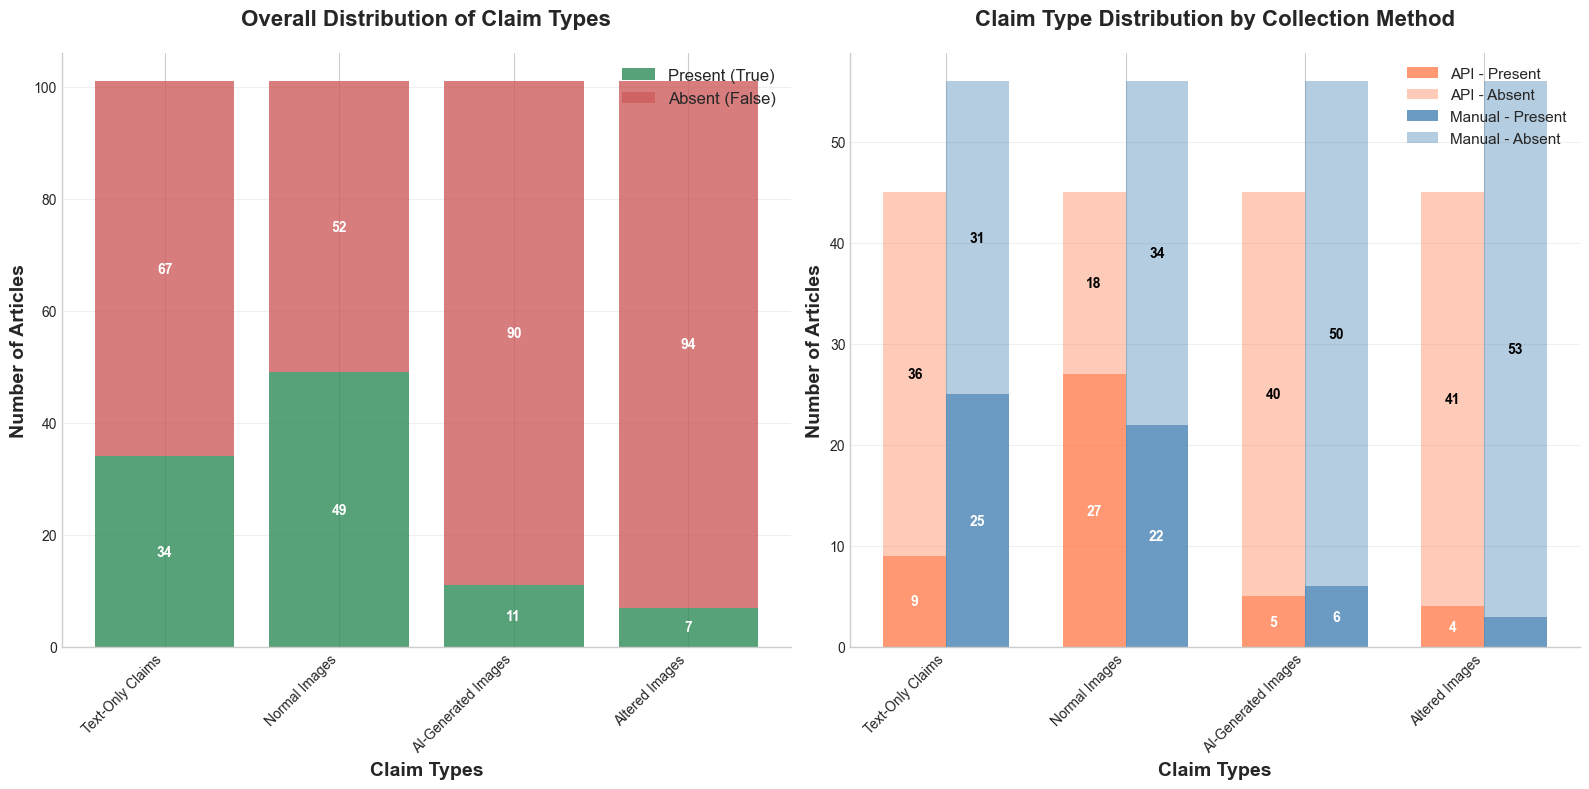

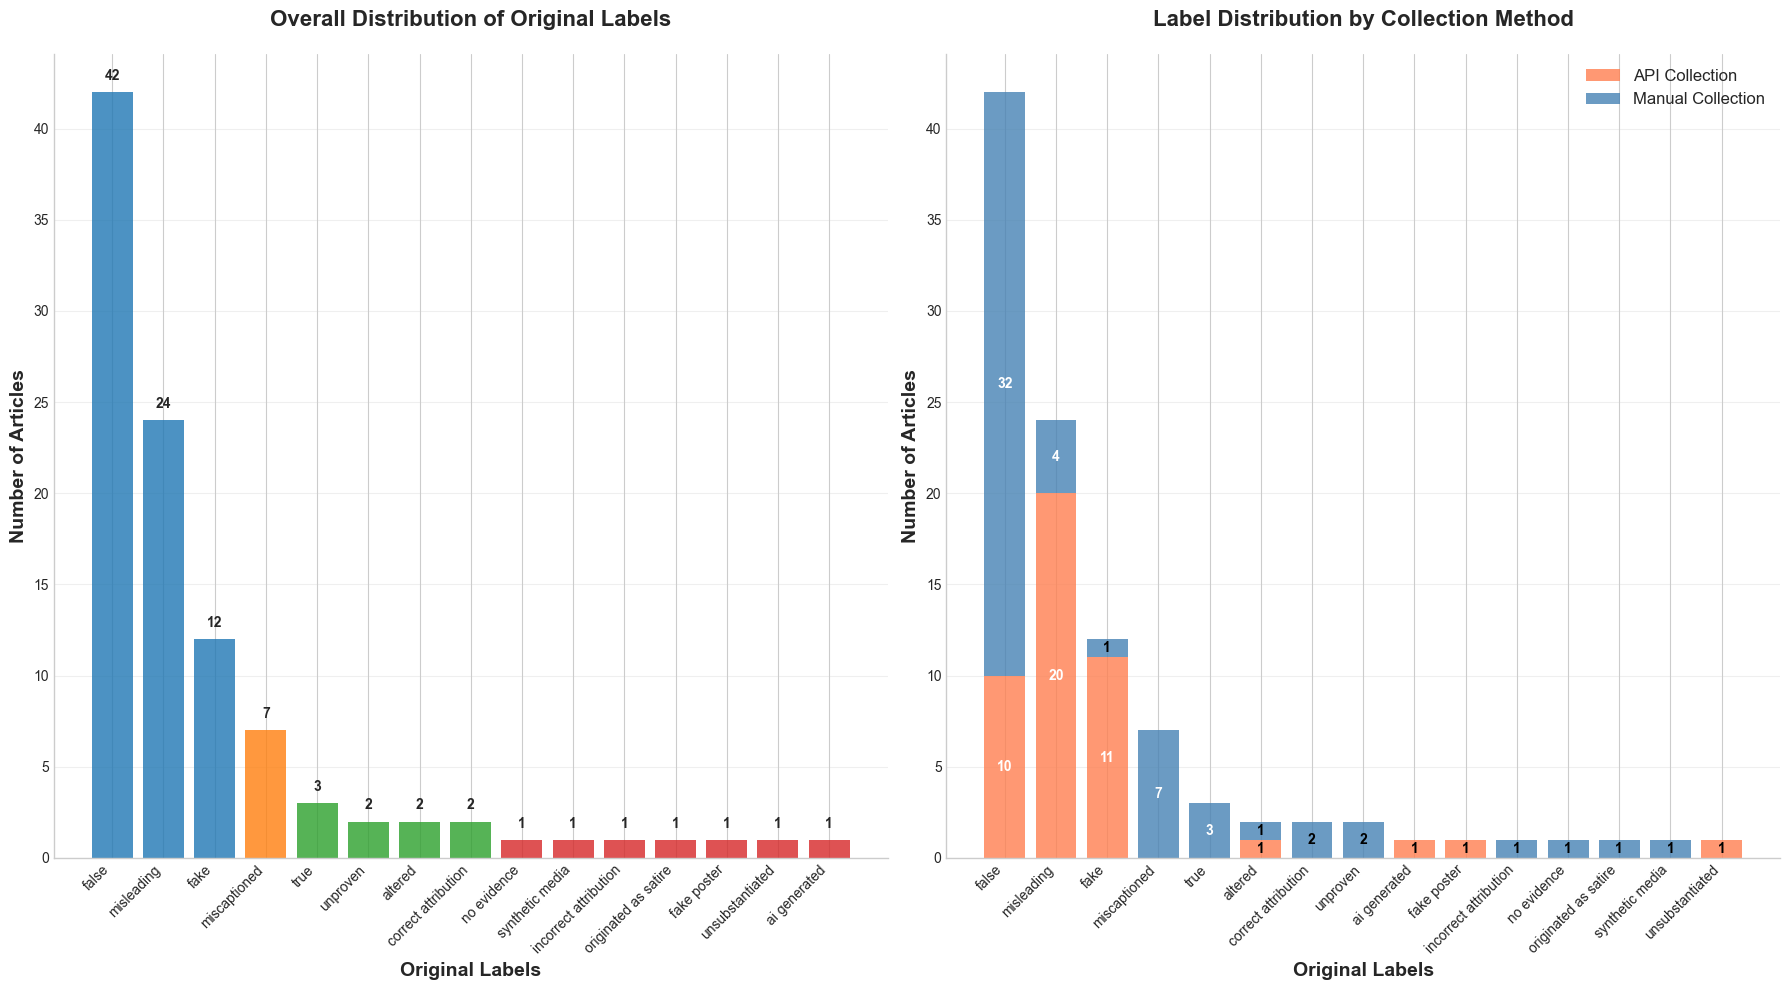

=== CLAIM TYPE SUMMARY ===
Total articles analyzed: 101

Claim type prevalence:
  Text-Only Claims: 34/101 (33.7%)
  Normal Images: 49/101 (48.5%)
  AI-Generated Images: 11/101 (10.9%)
  Altered Images: 7/101 (6.9%)

=== LABEL DISTRIBUTION SUMMARY ===
Total unique original labels: 15
Most common label: 'false' (42 articles)
API collection covers 7 different labels
Manual collection covers 12 different labels

=== CODE FOR YOUR DATA ===
# For claim types:
# df_claim_types = df[['Data_Collection_Type', 'Text_Only_Claim', 'Normal_Image', 'AI_Generated_Image', 'Altered_Image']]
# Then use similar logic as above

# For labels:
# df_labels = df.groupby('Data_Collection_Type')['Label_Website'].value_counts().reset_index()
# df_labels.columns = ['Data_Collection_Type', 'Label_Website', 'count']


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

# ========= CLAIM TYPE DISTRIBUTION =========

# Recreate claim type data
claim_type_overall = {
    'Text-Only Claims': {'True': 34, 'False': 67},
    'Normal Images': {'True': 49, 'False': 52},
    'AI-Generated Images': {'True': 11, 'False': 90},
    'Altered Images': {'True': 7, 'False': 94}
}

# By data collection type
claim_type_by_collection = {
    'Text-Only Claims': {'api': {'True': 9, 'False': 36}, 'manual': {'True': 25, 'False': 31}},
    'Normal Images': {'api': {'True': 27, 'False': 18}, 'manual': {'True': 22, 'False': 34}},
    'AI-Generated Images': {'api': {'True': 5, 'False': 40}, 'manual': {'True': 6, 'False': 50}},
    'Altered Images': {'api': {'True': 4, 'False': 41}, 'manual': {'True': 3, 'False': 53}}
}

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# === LEFT PLOT: Overall Distribution ===
claim_types = list(claim_type_overall.keys())
true_counts = [claim_type_overall[ct]['True'] for ct in claim_types]
false_counts = [claim_type_overall[ct]['False'] for ct in claim_types]

bars1 = ax1.bar(claim_types, true_counts, label='Present (True)', 
               color='#2E8B57', alpha=0.8)
bars2 = ax1.bar(claim_types, false_counts, bottom=true_counts,
               label='Absent (False)', color='#CD5C5C', alpha=0.8)

ax1.set_ylabel('Number of Articles', fontsize=14, fontweight='bold')
ax1.set_xlabel('Claim Types', fontsize=14, fontweight='bold')
ax1.set_title('Overall Distribution of Claim Types', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    if bar1.get_height() > 0:
        ax1.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2,
               f'{int(bar1.get_height())}', ha='center', va='center',
               fontweight='bold', color='white')
    if bar2.get_height() > 0:
        ax1.text(bar2.get_x() + bar2.get_width()/2, 
               bar1.get_height() + bar2.get_height()/2,
               f'{int(bar2.get_height())}', ha='center', va='center',
               fontweight='bold', color='white')

ax1.legend(fontsize=12)
ax1.grid(axis='y', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# === RIGHT PLOT: By Collection Type ===
# Prepare data for stacked bars
x_pos = np.arange(len(claim_types))
width = 0.35

# API data
api_true = [claim_type_by_collection[ct]['api']['True'] for ct in claim_types]
api_false = [claim_type_by_collection[ct]['api']['False'] for ct in claim_types]

# Manual data  
manual_true = [claim_type_by_collection[ct]['manual']['True'] for ct in claim_types]
manual_false = [claim_type_by_collection[ct]['manual']['False'] for ct in claim_types]

# Create grouped stacked bars
bars1 = ax2.bar(x_pos - width/2, api_true, width, label='API - Present', 
               color='#FF7F50', alpha=0.8)
bars2 = ax2.bar(x_pos - width/2, api_false, width, bottom=api_true,
               label='API - Absent', color='#FF7F50', alpha=0.4)
bars3 = ax2.bar(x_pos + width/2, manual_true, width, label='Manual - Present',
               color='#4682B4', alpha=0.8)
bars4 = ax2.bar(x_pos + width/2, manual_false, width, bottom=manual_true,
               label='Manual - Absent', color='#4682B4', alpha=0.4)

ax2.set_ylabel('Number of Articles', fontsize=14, fontweight='bold')
ax2.set_xlabel('Claim Types', fontsize=14, fontweight='bold')
ax2.set_title('Claim Type Distribution by Collection Method', fontsize=16, fontweight='bold', pad=20)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(claim_types)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels for grouped bars
all_bars = [bars1, bars2, bars3, bars4]
colors = ['white', 'black', 'white', 'black']

for bars, text_color in zip(all_bars, colors):
    for bar in bars:
        if bar.get_height() > 3:  # Only show labels if bar is tall enough
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2, 
                    bar.get_y() + height/2,
                    f'{int(height)}', ha='center', va='center',
                    fontweight='bold', color=text_color, fontsize=10)

ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# ========= LABEL DISTRIBUTION (BEFORE AGGREGATION) =========

# Label data
labels_overall = {
    'false': 42, 'misleading': 24, 'fake': 12, 'miscaptioned': 7, 'true': 3,
    'unproven': 2, 'altered': 2, 'correct attribution': 2, 'no evidence': 1,
    'synthetic media': 1, 'incorrect attribution': 1, 'originated as satire': 1,
    'fake poster': 1, 'unsubstantiated': 1, 'ai generated': 1
}

# By collection type
labels_by_collection = {
    'api': {'misleading': 20, 'fake': 11, 'false': 10, 'ai generated': 1, 
            'altered': 1, 'fake poster': 1, 'unsubstantiated': 1},
    'manual': {'false': 32, 'miscaptioned': 7, 'misleading': 4, 'true': 3,
               'correct attribution': 2, 'unproven': 2, 'altered': 1, 'fake': 1,
               'incorrect attribution': 1, 'no evidence': 1, 'originated as satire': 1,
               'synthetic media': 1}
}

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# === LEFT PLOT: Overall Label Distribution ===
# Sort labels by frequency
sorted_labels = sorted(labels_overall.items(), key=lambda x: x[1], reverse=True)
labels = [item[0] for item in sorted_labels]
counts = [item[1] for item in sorted_labels]

# Use different colors for different frequency ranges
colors = ['#1f77b4' if c >= 10 else '#ff7f0e' if c >= 5 else '#2ca02c' if c >= 2 else '#d62728' 
          for c in counts]

bars = ax1.bar(labels, counts, color=colors, alpha=0.8)

ax1.set_ylabel('Number of Articles', fontsize=14, fontweight='bold')
ax1.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax1.set_title('Overall Distribution of Original Labels', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax1.grid(axis='y', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# === RIGHT PLOT: By Collection Type ===
# Get all unique labels and sort them by total frequency
all_labels = sorted(set(list(labels_by_collection['api'].keys()) + 
                       list(labels_by_collection['manual'].keys())))

# Create data arrays for stacked bars
api_counts = [labels_by_collection['api'].get(label, 0) for label in all_labels]
manual_counts = [labels_by_collection['manual'].get(label, 0) for label in all_labels]

# Sort by total count
label_totals = [(label, api_counts[i] + manual_counts[i]) 
                for i, label in enumerate(all_labels)]
label_totals.sort(key=lambda x: x[1], reverse=True)

sorted_labels_collection = [item[0] for item in label_totals]
api_sorted = [labels_by_collection['api'].get(label, 0) for label in sorted_labels_collection]
manual_sorted = [labels_by_collection['manual'].get(label, 0) for label in sorted_labels_collection]

# Create stacked bars
bars1 = ax2.bar(sorted_labels_collection, api_sorted, label='API Collection',
               color='#FF7F50', alpha=0.8)
bars2 = ax2.bar(sorted_labels_collection, manual_sorted, bottom=api_sorted,
               label='Manual Collection', color='#4682B4', alpha=0.8)

ax2.set_ylabel('Number of Articles', fontsize=14, fontweight='bold')
ax2.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax2.set_title('Label Distribution by Collection Method', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    if bar1.get_height() > 0:
        ax2.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2,
               f'{int(bar1.get_height())}', ha='center', va='center',
               fontweight='bold', color='white' if bar1.get_height() >= 3 else 'black')
    if bar2.get_height() > 0:
        ax2.text(bar2.get_x() + bar2.get_width()/2, 
               bar1.get_height() + bar2.get_height()/2,
               f'{int(bar2.get_height())}', ha='center', va='center',
               fontweight='bold', color='white' if bar2.get_height() >= 3 else 'black')

ax2.legend(fontsize=12)
ax2.grid(axis='y', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Summary statistics
print("=== CLAIM TYPE SUMMARY ===")
total_articles = 101
print(f"Total articles analyzed: {total_articles}")
print("\nClaim type prevalence:")
for ct in claim_types:
    true_count = claim_type_overall[ct]['True']
    percentage = (true_count / total_articles) * 100
    print(f"  {ct}: {true_count}/{total_articles} ({percentage:.1f}%)")

print("\n=== LABEL DISTRIBUTION SUMMARY ===")
print(f"Total unique original labels: {len(labels_overall)}")
print(f"Most common label: '{sorted_labels[0][0]}' ({sorted_labels[0][1]} articles)")
print(f"API collection covers {len(labels_by_collection['api'])} different labels")
print(f"Manual collection covers {len(labels_by_collection['manual'])} different labels")

# Code to recreate with your actual data
print("\n=== CODE FOR YOUR DATA ===")
print("# For claim types:")
print("# df_claim_types = df[['Data_Collection_Type', 'Text_Only_Claim', 'Normal_Image', 'AI_Generated_Image', 'Altered_Image']]")
print("# Then use similar logic as above")
print("\n# For labels:")
print("# df_labels = df.groupby('Data_Collection_Type')['Label_Website'].value_counts().reset_index()")
print("# df_labels.columns = ['Data_Collection_Type', 'Label_Website', 'count']")

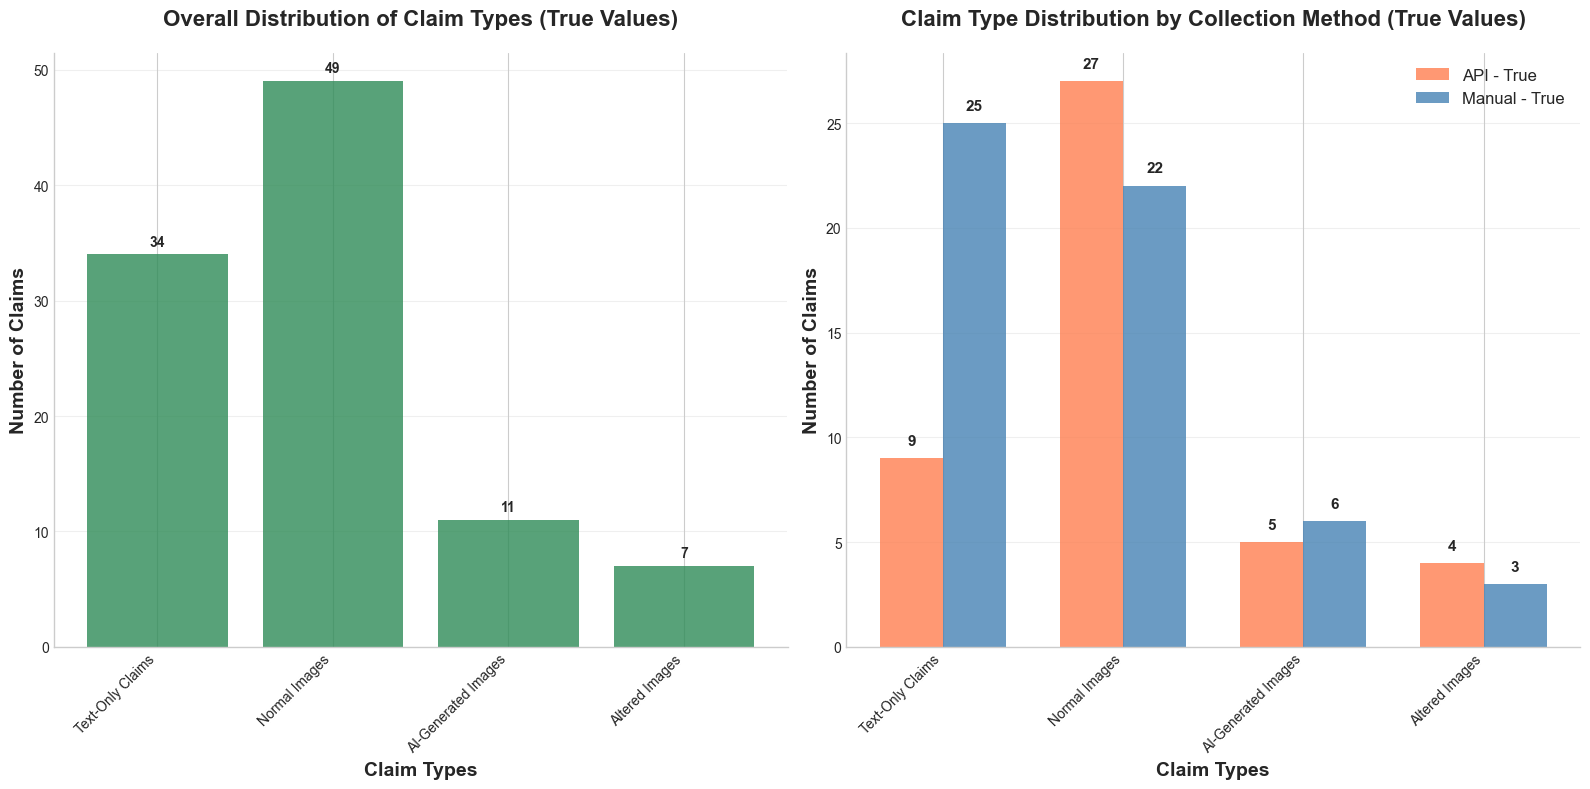

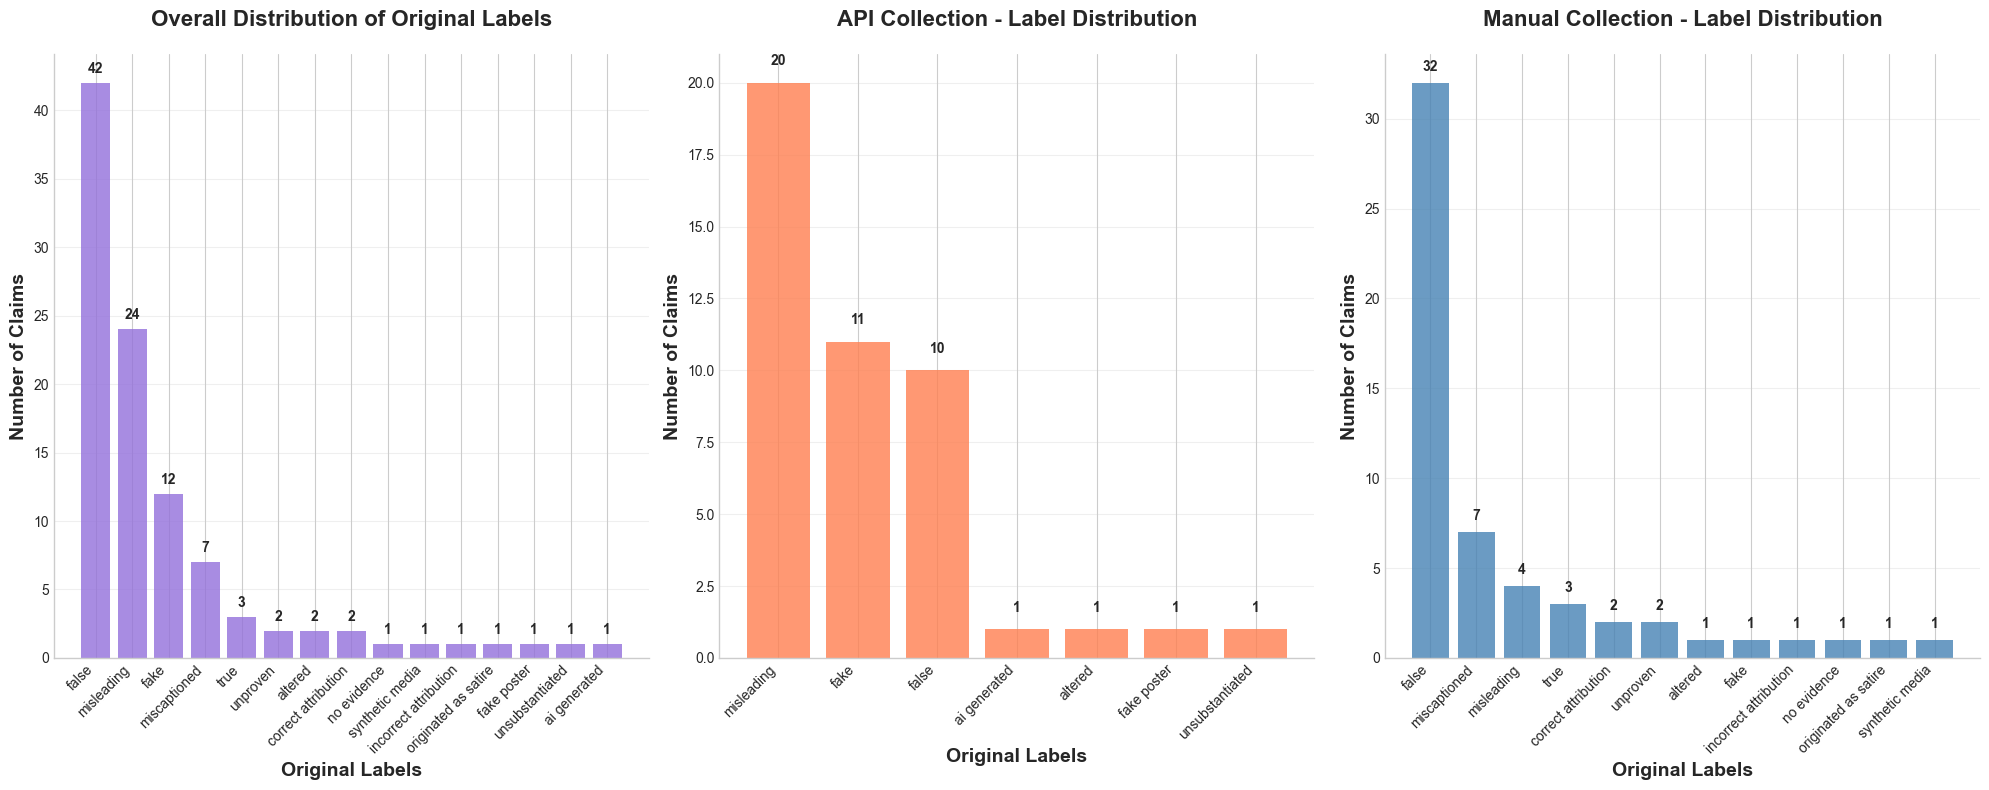

=== CLAIM TYPE SUMMARY (TRUE VALUES ONLY) ===
Total articles analyzed: 101

Claim type prevalence (True values only):
  Text-Only Claims: 34/101 (33.7%)
  Normal Images: 49/101 (48.5%)
  AI-Generated Images: 11/101 (10.9%)
  Altered Images: 7/101 (6.9%)

=== LABEL DISTRIBUTION SUMMARY ===
Total unique original labels: 15
Most common label: 'false' (42 claims)
API collection covers 7 different labels
Manual collection covers 12 different labels
API collection total: 45 claims
Manual collection total: 56 claims

=== CODE FOR YOUR DATA ===
# For claim types (True values only):
# true_only_counts = df.groupby('Data_Collection_Type')[['Text_Only_Claim', 'Normal_Image', 'AI_Generated_Image', 'Altered_Image']].sum()

# For labels:
# df_labels = df.groupby('Data_Collection_Type')['Label_Website'].value_counts().reset_index()
# df_labels.columns = ['Data_Collection_Type', 'Label_Website', 'count']


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

# ========= CLAIM TYPE DISTRIBUTION (TRUE VALUES ONLY) =========

# Recreate claim type data - only True values
claim_type_overall = {
    'Text-Only Claims': 34,
    'Normal Images': 49,
    'AI-Generated Images': 11,
    'Altered Images': 7
}

# By data collection type - only True values
claim_type_by_collection = {
    'Text-Only Claims': {'api': 9, 'manual': 25},
    'Normal Images': {'api': 27, 'manual': 22},
    'AI-Generated Images': {'api': 5, 'manual': 6},
    'Altered Images': {'api': 4, 'manual': 3}
}

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# === LEFT PLOT: Overall Distribution (True values only) ===
claim_types = list(claim_type_overall.keys())
true_counts = list(claim_type_overall.values())

bars = ax1.bar(claim_types, true_counts, label='True', 
               color='#2E8B57', alpha=0.8)

ax1.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax1.set_xlabel('Claim Types', fontsize=14, fontweight='bold')
ax1.set_title('Overall Distribution of Claim Types (True Values)', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax1.grid(axis='y', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# === RIGHT PLOT: By Collection Type (True values only) ===
# Prepare data for grouped bars
x_pos = np.arange(len(claim_types))
width = 0.35

# API and Manual data - True values only
api_true = [claim_type_by_collection[ct]['api'] for ct in claim_types]
manual_true = [claim_type_by_collection[ct]['manual'] for ct in claim_types]

# Create grouped bars
bars1 = ax2.bar(x_pos - width/2, api_true, width, label='API - True', 
               color='#FF7F50', alpha=0.8)
bars2 = ax2.bar(x_pos + width/2, manual_true, width, label='Manual - True',
               color='#4682B4', alpha=0.8)

ax2.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax2.set_xlabel('Claim Types', fontsize=14, fontweight='bold')
ax2.set_title('Claim Type Distribution by Collection Method (True Values)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(claim_types)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels for grouped bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                f'{int(height)}', ha='center', va='bottom',
                fontweight='bold', fontsize=11)

ax2.legend(fontsize=12)
ax2.grid(axis='y', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# ========= LABEL DISTRIBUTION (BEFORE AGGREGATION) =========

# Label data
labels_overall = {
    'false': 42, 'misleading': 24, 'fake': 12, 'miscaptioned': 7, 'true': 3,
    'unproven': 2, 'altered': 2, 'correct attribution': 2, 'no evidence': 1,
    'synthetic media': 1, 'incorrect attribution': 1, 'originated as satire': 1,
    'fake poster': 1, 'unsubstantiated': 1, 'ai generated': 1
}

# By collection type
labels_by_collection = {
    'api': {'misleading': 20, 'fake': 11, 'false': 10, 'ai generated': 1, 
            'altered': 1, 'fake poster': 1, 'unsubstantiated': 1},
    'manual': {'false': 32, 'miscaptioned': 7, 'misleading': 4, 'true': 3,
               'correct attribution': 2, 'unproven': 2, 'altered': 1, 'fake': 1,
               'incorrect attribution': 1, 'no evidence': 1, 'originated as satire': 1,
               'synthetic media': 1}
}

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

# === LEFT PLOT: Overall Label Distribution ===
# Sort labels by frequency
sorted_labels = sorted(labels_overall.items(), key=lambda x: x[1], reverse=True)
labels = [item[0] for item in sorted_labels]
counts = [item[1] for item in sorted_labels]

# Use single color (purple/magenta)
bars = ax1.bar(labels, counts, color='#9370DB', alpha=0.8)

ax1.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax1.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax1.set_title('Overall Distribution of Original Labels', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax1.grid(axis='y', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# === MIDDLE PLOT: API Collection Labels ===
api_labels = labels_by_collection['api']
# Sort API labels by frequency
sorted_api = sorted(api_labels.items(), key=lambda x: x[1], reverse=True)
api_label_names = [item[0] for item in sorted_api]
api_label_counts = [item[1] for item in sorted_api]

bars_api = ax2.bar(api_label_names, api_label_counts, color='#FF7F50', alpha=0.8)

ax2.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax2.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax2.set_title('API Collection - Label Distribution', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for bar in bars_api:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax2.grid(axis='y', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# === RIGHT PLOT: Manual Collection Labels ===
manual_labels = labels_by_collection['manual']
# Sort manual labels by frequency
sorted_manual = sorted(manual_labels.items(), key=lambda x: x[1], reverse=True)
manual_label_names = [item[0] for item in sorted_manual]
manual_label_counts = [item[1] for item in sorted_manual]

bars_manual = ax3.bar(manual_label_names, manual_label_counts, color='#4682B4', alpha=0.8)

ax3.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax3.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax3.set_title('Manual Collection - Label Distribution', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for bar in bars_manual:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax3.grid(axis='y', alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Summary statistics
print("=== CLAIM TYPE SUMMARY (TRUE VALUES ONLY) ===")
total_articles = 101
print(f"Total articles analyzed: {total_articles}")
print("\nClaim type prevalence (True values only):")
for ct, count in claim_type_overall.items():
    percentage = (count / total_articles) * 100
    print(f"  {ct}: {count}/{total_articles} ({percentage:.1f}%)")

print("\n=== LABEL DISTRIBUTION SUMMARY ===")
print(f"Total unique original labels: {len(labels_overall)}")
print(f"Most common label: '{sorted_labels[0][0]}' ({sorted_labels[0][1]} claims)")
print(f"API collection covers {len(labels_by_collection['api'])} different labels")
print(f"Manual collection covers {len(labels_by_collection['manual'])} different labels")

# Show totals for each collection method
api_total = sum(labels_by_collection['api'].values())
manual_total = sum(labels_by_collection['manual'].values())
print(f"API collection total: {api_total} claims")
print(f"Manual collection total: {manual_total} claims")

# Code to recreate with your actual data
print("\n=== CODE FOR YOUR DATA ===")
print("# For claim types (True values only):")
print("# true_only_counts = df.groupby('Data_Collection_Type')[['Text_Only_Claim', 'Normal_Image', 'AI_Generated_Image', 'Altered_Image']].sum()")
print("\n# For labels:")
print("# df_labels = df.groupby('Data_Collection_Type')['Label_Website'].value_counts().reset_index()")
print("# df_labels.columns = ['Data_Collection_Type', 'Label_Website', 'count']")

In [39]:
## label distribution before label methodology and label aggregation

df_new = pd.read_csv("gaza_israel_dataset_combined_010724_300425_before_label_aggregation.csv")
print(len(df_new))
df_new.head()

111


,Unnamed: 0,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
0,0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in ...,2025-04-06 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://pbs.twimg.com/media/Gn4wjgBXoAALax1?fo...,"""BREAKING: Reports confirm the death of Genera...","""BREAKING: Reports confirm the death of Genera...",A reverse image search reveals the photograph ...,False,True,False,False,manual
1,1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake...",2025-03-29 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://web.archive.org/web/20250402070342im_/...,"""A 7.9-magnitude earthquake in Myanmar, devast...","""A 7.9-magnitude earthquake in Myanmar, devast...","However, a reverse image search for the first ...",False,True,False,False,manual
2,2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is ma...,2025-03-24 00:00:00,2025-03-27 00:00:00,Israeli-Palestinian conflict,false,https://scontent-hou1-1.xx.fbcdn.net/v/t39.308...,"""A mother holds the bones of her son in Gaza. ...","""A mother holds the bones of her son in Gaza. ...",A keyword search found a wider-angle version o...,False,False,True,False,manual
3,3,3,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36XY2FV,Old image misrepresented as 'Israeli settlers'...,2025-02-16 00:00:00,2025-02-19 00:00:00,Israeli-Palestinian conflict,false,https://pbs.twimg.com/media/Gj5tbXiaQAAoG1z?fo...,"""Israeli media reports there are Jews who have...","""Israeli media reports there are Jews who have...",A reverse image search via Google traced the v...,False,True,False,False,manual
4,4,4,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36RF6BZ,"Picture shows Israel's 2018 Gaza attack, not a...",2024-12-22 00:00:00,2024-12-26 00:00:00,Israeli-Palestinian conflict,false,https://media.gettyimages.com/id/1060718622/de...,"""Americans bombarded Yemen in reprisal after Y...","""Americans bombarded Yemen in reprisal after Y...",But a reverse image search on Google found the...,False,True,False,False,manual


In [40]:
df_new["Label_Website"].value_counts()

Label_Website
false                    47
misleading               27
fake                     12
miscaptioned              7
true                      3
unproven                  2
correct attribution       2
altered                   2
synthetic media           1
incorrect attribution     1
no evidence               1
originated as satire      1
fake poster               1
unsubstantiated           1
disinformation            1
ai generated              1
edited picture            1
Name: count, dtype: int64

In [45]:
df_new.groupby("Data_Collection_Type")["Label_Website"].value_counts()

Data_Collection_Type  Label_Website        
api                   misleading               23
                      false                    15
                      fake                     11
                      ai generated              1
                      altered                   1
                      disinformation            1
                      edited picture            1
                      fake poster               1
                      unsubstantiated           1
manual                false                    32
                      miscaptioned              7
                      misleading                4
                      true                      3
                      correct attribution       2
                      unproven                  2
                      altered                   1
                      fake                      1
                      incorrect attribution     1
                      no evidence               1
      

In [47]:
df_new["Data_Collection_Type"].value_counts()

Data_Collection_Type
manual    56
api       55
Name: count, dtype: int64

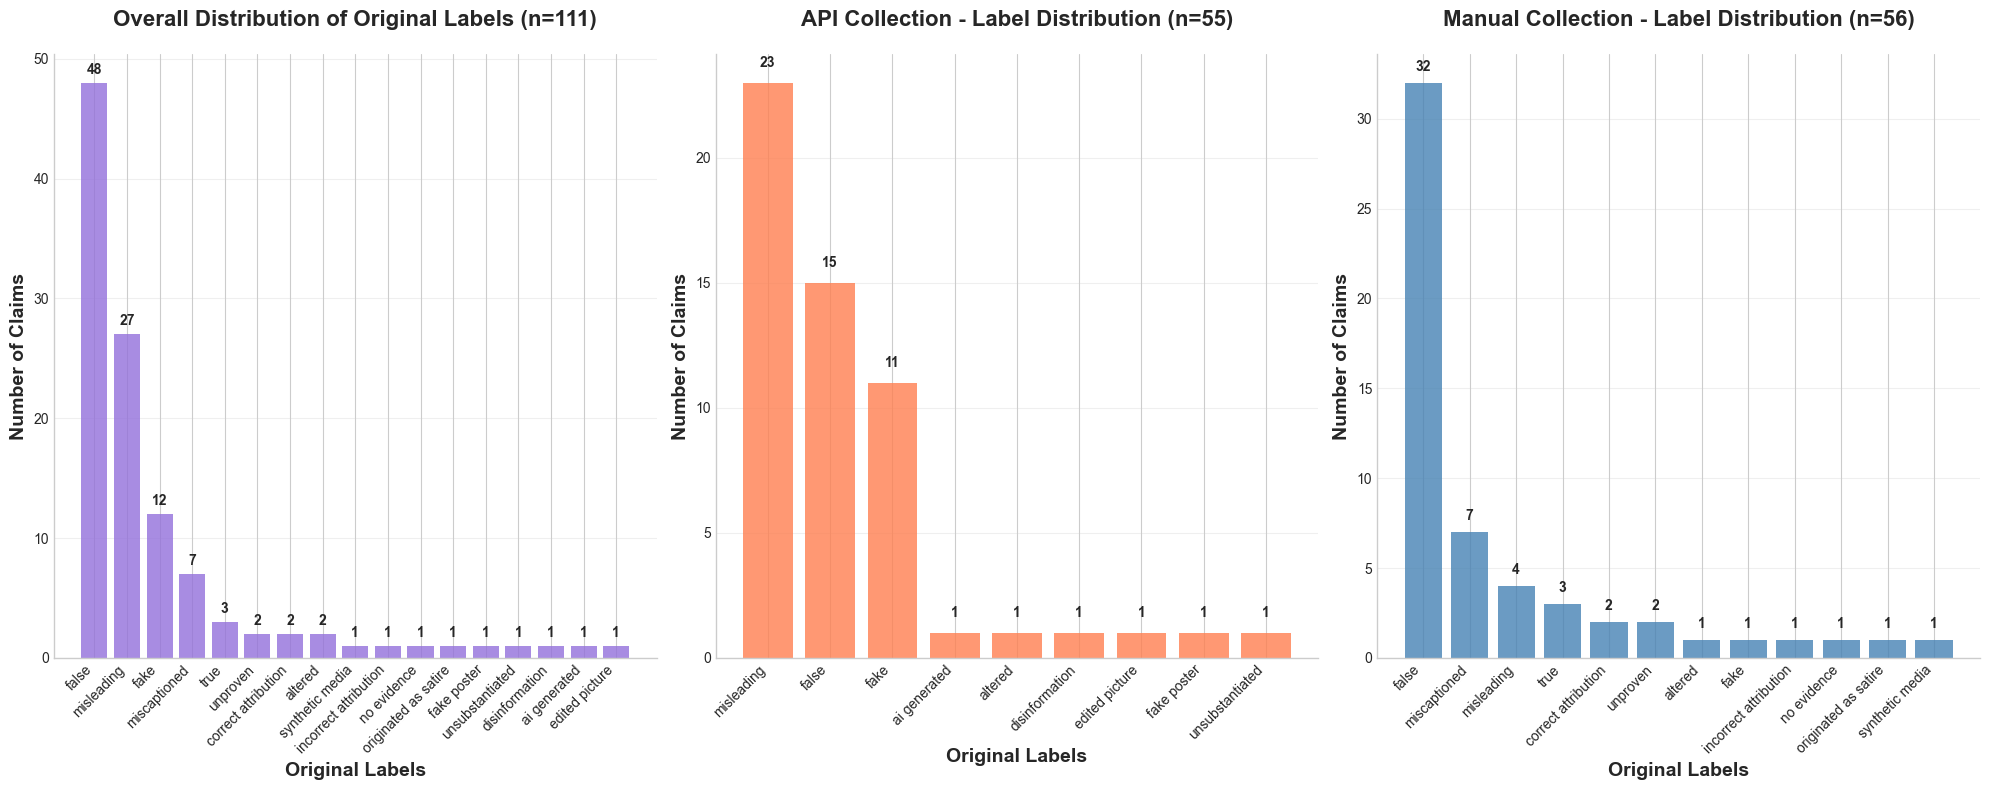

In [48]:
# ========= LABEL DISTRIBUTION (BEFORE METHODOLOGY AND LABEL AGGREGATION) =========



labels_overall = {"false": 48,
                  "misleading": 27,
                  "fake": 12, 
                  "miscaptioned": 7,
                  "true": 3,
                  "unproven": 2,
                  "correct attribution": 2,
                  "altered": 2,
                  "synthetic media": 1,
                  "incorrect attribution": 1,
                  "no evidence": 1,
                  "originated as satire": 1,
                  "fake poster": 1,
                  "unsubstantiated": 1,
                  "disinformation": 1,
                  "ai generated": 1,
                  "edited picture": 1}



labels_by_collection = {
        "api": {"misleading": 23, "false": 15, "fake": 11, "ai generated": 1,
                "altered": 1, "disinformation": 1, "edited picture": 1, "fake poster": 1,
                "unsubstantiated": 1},
        'manual': {'false': 32, 'miscaptioned': 7, 'misleading': 4, 'true': 3,
               'correct attribution': 2, 'unproven': 2, 'altered': 1, 'fake': 1,
               'incorrect attribution': 1, 'no evidence': 1, 'originated as satire': 1,
               'synthetic media': 1}
}



# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

# === LEFT PLOT: Overall Label Distribution ===
# Sort labels by frequency
sorted_labels = sorted(labels_overall.items(), key=lambda x: x[1], reverse=True)
labels = [item[0] for item in sorted_labels]
counts = [item[1] for item in sorted_labels]

# Use single color (purple/magenta)
bars = ax1.bar(labels, counts, color='#9370DB', alpha=0.8)

ax1.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax1.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax1.set_title('Overall Distribution of Original Labels (n=111)', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax1.grid(axis='y', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# === MIDDLE PLOT: API Collection Labels ===
api_labels = labels_by_collection['api']
# Sort API labels by frequency
sorted_api = sorted(api_labels.items(), key=lambda x: x[1], reverse=True)
api_label_names = [item[0] for item in sorted_api]
api_label_counts = [item[1] for item in sorted_api]

bars_api = ax2.bar(api_label_names, api_label_counts, color='#FF7F50', alpha=0.8)

ax2.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax2.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax2.set_title('API Collection - Label Distribution (n=55)', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for bar in bars_api:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax2.grid(axis='y', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# === RIGHT PLOT: Manual Collection Labels ===
manual_labels = labels_by_collection['manual']
# Sort manual labels by frequency
sorted_manual = sorted(manual_labels.items(), key=lambda x: x[1], reverse=True)
manual_label_names = [item[0] for item in sorted_manual]
manual_label_counts = [item[1] for item in sorted_manual]

bars_manual = ax3.bar(manual_label_names, manual_label_counts, color='#4682B4', alpha=0.8)

ax3.set_ylabel('Number of Claims', fontsize=14, fontweight='bold')
ax3.set_xlabel('Original Labels', fontsize=14, fontweight='bold')
ax3.set_title('Manual Collection - Label Distribution (n=56)', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for bar in bars_manual:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax3.grid(axis='y', alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [49]:
df_new["Website"].value_counts()

Website
misbar.com            26
Reuters               22
AFP Factcheck         18
Snopes                11
logicallyfacts.com     7
Politifact             5
newsmobile.in          4
usatoday.com           4
checkyourfact.com      3
newsmeter.in           3
factly.in              2
leadstories.com        2
voanews.com            1
thip.media             1
factchecker.gr         1
thequint.com           1
Name: count, dtype: int64

In [50]:
df_new.groupby("Data_Collection_Type")["Website"].value_counts()

Data_Collection_Type  Website           
api                   misbar.com            26
                      logicallyfacts.com     7
                      newsmobile.in          4
                      usatoday.com           4
                      checkyourfact.com      3
                      newsmeter.in           3
                      factly.in              2
                      leadstories.com        2
                      factchecker.gr         1
                      thequint.com           1
                      thip.media             1
                      voanews.com            1
manual                Reuters               22
                      AFP Factcheck         18
                      Snopes                11
                      Politifact             5
Name: count, dtype: int64

In [53]:
# Recreate your data for demonstration
data = {
    'Data_Collection_Type': ['api', 'api', 'api', 'api', 'api', 'api', 'api', 'api', 'api', 'api', 'api', 'api',
                           'manual', 'manual', 'manual', 'manual'],
    'Website': ['misbar.com', 'logicallyfacts.com', 'usatoday.com', "newsmobile.in",
               'checkyourfact.com', 'newsmeter.in', "factly.in", "leadstories.com", "factchecker.gr", "thequint.com", "thip.media", "voanews.com",
               'Reuters', 'AFP Factcheck', 'Snopes', 'Politifact'],
    'count': [26, 7, 4, 4, 3, 3, 2, 2, 1, 1, 1,1, 22, 18, 11, 5]
}
df = pd.DataFrame(data)

# Set academic style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")



# Separate data by collection type
api_data = df[df['Data_Collection_Type'] == 'api'].sort_values('count', ascending=True)
manual_data = df[df['Data_Collection_Type'] == 'manual'].sort_values('count', ascending=True)

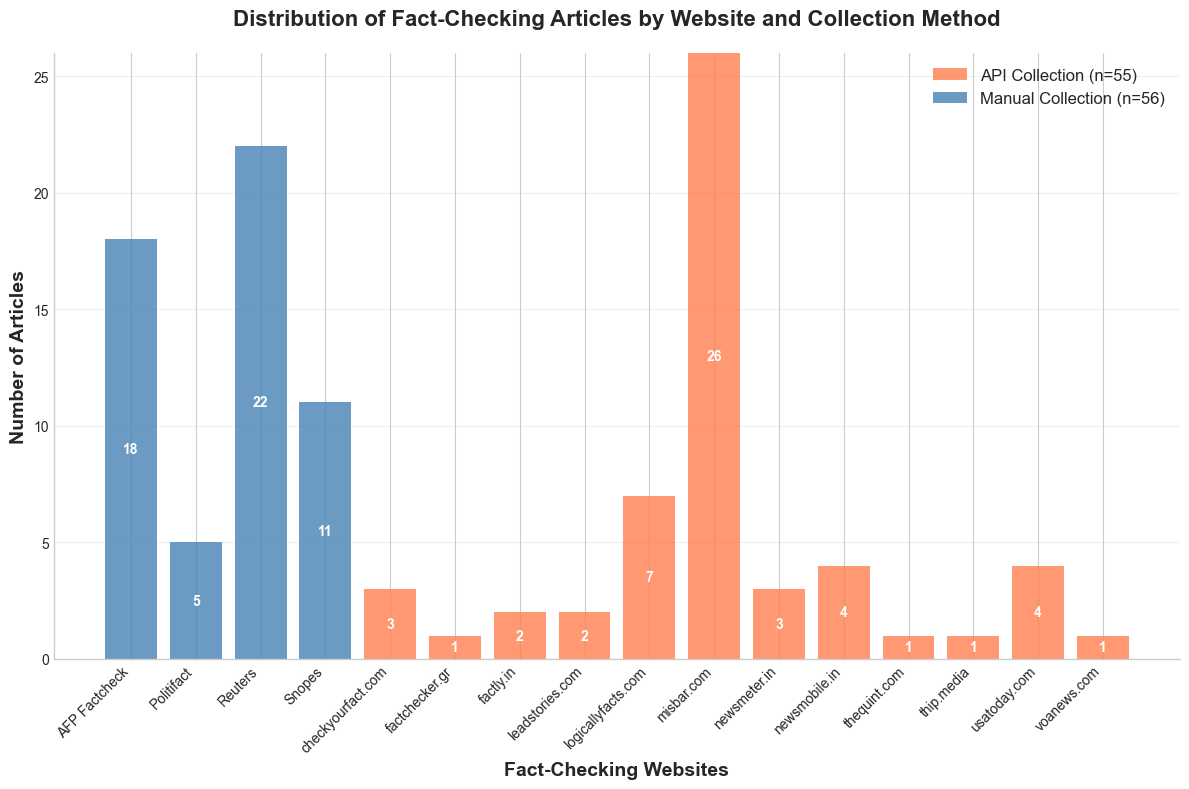

In [55]:
# Option 3: Stacked Bar Chart with Totals
fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for stacked bar
websites_api = api_data.set_index('Website')['count']
websites_manual = manual_data.set_index('Website')['count']

# Create combined index
all_websites = sorted(set(api_data['Website'].tolist() + manual_data['Website'].tolist()))

# Prepare data arrays
api_counts = [websites_api.get(site, 0) for site in all_websites]
manual_counts = [websites_manual.get(site, 0) for site in all_websites]

# Create stacked bar chart
bars1 = ax.bar(all_websites, api_counts, label='API Collection (n=55)', 
              color='#FF7F50', alpha=0.8)
bars2 = ax.bar(all_websites, manual_counts, bottom=api_counts,
              label='Manual Collection (n=56)', color='#4682B4', alpha=0.8)

# Customize
ax.set_ylabel('Number of Articles', fontsize=14, fontweight='bold')
ax.set_xlabel('Fact-Checking Websites', fontsize=14, fontweight='bold')
ax.set_title('Distribution of Fact-Checking Articles by Website and Collection Method',
            fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    if bar1.get_height() > 0:
        ax.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2,
               f'{int(bar1.get_height())}', ha='center', va='center',
               fontweight='bold', color='white')
    if bar2.get_height() > 0:
        ax.text(bar2.get_x() + bar2.get_width()/2, 
               bar1.get_height() + bar2.get_height()/2,
               f'{int(bar2.get_height())}', ha='center', va='center',
               fontweight='bold', color='white')

# Add legend and grid
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()